In [3]:
import pickle
from pandarallel import pandarallel
pandarallel.initialize(use_memory_fs=False)
import numpy as np 
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import argparse
import os 
import glob
from collections import namedtuple, defaultdict

import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""

INFO: Pandarallel will run on 10 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
model_name = "v16_elegammasep"
model_dir = "../models/"+model_name

model_version = 1
numpy_version = 1
files_ele = f"/storage/ECAL/training_data/wp_comparison/electrons/numpy_wp_ele_v1/training/"
limit_files = 20

cols = ["seed_eta", "seed_iz","en_seed","et_seed",
        "cluster_deta", "cluster_dphi", "en_cluster", "et_cluster",
       "seed_f5_r9", "seed_f5_sigmaIetaIeta","seed_f5_sigmaIetaIphi","seed_f5_sigmaIphiIphi",
        "seed_f5_swissCross","seed_nxtals", "seed_etaWidth", "seed_phiWidth",
        "cl_f5_r9", "cl_f5_sigmaIetaIeta","cl_f5_sigmaIetaIphi","cl_f5_sigmaIphiIphi",
        "cl_f5_swissCross", "cl_nxtals", "cl_etaWidth", "cl_phiWidth"]


In [3]:
from keras.models  import load_model

model_EB = load_model(model_dir + f"/model_v{model_version}_EB_ele.hd5")
model_EE = load_model(model_dir + f"/model_v{model_version}_EE_ele.hd5")
scaler_EB = pickle.load(open(model_dir + f"/scaler_model_v{model_version}_EB_ele.pkl", "rb"))
scaler_EE = pickle.load(open(model_dir + f"/scaler_model_v{model_version}_EE_ele.pkl", "rb"))


Using TensorFlow backend.


Including only clusters where the seed is calomatched

In [4]:
datas_ele = []

i = 0
for f in glob.glob(files_ele+"*.pkl"):
    if i>limit_files :continue
    d = pickle.load(open(f, "rb"))   
    datas_ele.append( d[(d.is_seed_calo_matched == True)] )
    i+=1
    
data = pd.concat(datas_ele, ignore_index=True)
print("N events ele: ",len(data))

    

N events ele:  6396025


In [5]:
print('EB')
data.loc[data.seed_iz==0, "y"] = model_EB.predict(scaler_EB.transform(data[data.seed_iz==0][cols].values), batch_size=4096)
print('EE')
data.loc[data.seed_iz!=0, "y"] = model_EE.predict(scaler_EE.transform(data[data.seed_iz!=0][cols].values), batch_size=4096)

EB
EE


In [6]:
data.head()

calo_seed_index  cl_etaWidth  cl_f5_r9  cl_f5_sigmaIetaIeta  \
0                3     0.008821  0.986095             0.023195   
1                1     0.007490  0.956099             0.008669   
2                2     0.005205  1.019101             0.007009   
3                2     0.004601  1.023266             0.006267   
4                1     0.004193  0.964260             0.008879   

   cl_f5_sigmaIetaIphi  cl_f5_sigmaIphiIphi  cl_f5_swissCross  cl_nxtals  \
0             0.000007             0.025359          0.760485         17   
1             0.000010             0.014332          0.752573         14   
2             0.000007             0.017297          0.837459         11   
3             0.000021             0.025930          0.532632         11   
4            -0.000009             0.017976          0.459949          8   

   cl_phiWidth  cluster_deta  ...  seed_f5_sigmaIetaIeta  \
0     0.009344      0.000000  ...               0.023195   
1     0.010379      0.000000  ...               0.008669   
2     0.005961      0.000000  ...               0.007009   
3     0.012644     -0.000637  ...               0.007009   
4     0.012659     -0.001601  ...               0.008669   

   seed_f5_sigmaIetaIphi  seed_f5_sigmaIphiIphi  seed_f5_swissCross  seed_iz  \
0               0.000007               0.025359            0.760485       -1   
1               0.000010               0.014332            0.752573        0   
2               0.000007               0.017297            0.837459        0   
3               0.000007               0.017297            0.837459        0   
4               0.000010               0.014332            0.752573        0   

   seed_nxtals  seed_phi  seed_phiWidth  window_index         y  
0           17 -1.481730       0.009344     fgztfimoz  1.000000  
1           14 -1.889680       0.010379     xhhruzwpi  0.999995  
2           11  2.152215       0.005961     voinswapq  1.000000  
3           11  2.152215       0.005961     voinswapq  1.000000  
4           14 -1.889680       0.010379     xhhruzwpi  0.999996  

[5 rows x 43 columns]

In [7]:
data.columns

Index(['calo_seed_index', 'cl_etaWidth', 'cl_f5_r9', 'cl_f5_sigmaIetaIeta',
       'cl_f5_sigmaIetaIphi', 'cl_f5_sigmaIphiIphi', 'cl_f5_swissCross',
       'cl_nxtals', 'cl_phiWidth', 'cluster_deta', 'cluster_dphi',
       'cluster_iz', 'en_cluster', 'en_cluster_calib', 'en_seed',
       'en_seed_calib', 'en_true', 'et_cluster', 'et_cluster_calib', 'et_seed',
       'et_seed_calib', 'et_true', 'in_geom_mustache', 'in_mustache',
       'in_scluster', 'is_calo_matched', 'is_seed', 'is_seed_calo_matched',
       'is_seed_mustached_matched', 'mustache_seed_index', 'seed_eta',
       'seed_etaWidth', 'seed_f5_r9', 'seed_f5_sigmaIetaIeta',
       'seed_f5_sigmaIetaIphi', 'seed_f5_sigmaIphiIphi', 'seed_f5_swissCross',
       'seed_iz', 'seed_nxtals', 'seed_phi', 'seed_phiWidth', 'window_index',
       'y'],
      dtype='object')

In [9]:
data.window_index.unique().shape

(804139,)

In [ ]:
thresholds = [0.5,0.6,0.7,0.8,0.9]

from multiprocessing import Pool

def analyze(group):
    grid,g = group
    
    data_calo = defaultdict(list)
    true_en = g.en_true.values[0]
    in_sc_true = np.cast['int32'](g.in_scluster.values)
    
    #do not count seeds for the ncls metrics
    nclusters = len(g) -1
    
    for threshold in thresholds:
        mask = np.cast['int32']((g.y.values > threshold))
        mask_withseed = np.cast['int32']((g.y.values > threshold)| (g.is_seed))

        pred_en =  np.sum(g.en_cluster.values * mask_withseed, axis=-1)
        
        tp =  np.cast['int32']((in_sc_true * mask_withseed) ==1)
        fp =  np.cast['int32']((in_sc_true - mask_withseed) <0)
        fn =  np.cast['int32']((in_sc_true - mask_withseed) >0)

        E_tp = np.sum(g.en_cluster.values * tp, axis=-1)
        E_fp = np.sum(g.en_cluster.values * fp, axis=-1)
        E_fn = np.sum(g.en_cluster.values * fn, axis=-1)
        
        data_calo['thres'].append(threshold)
        data_calo['seed_eta'].append(g.seed_eta.values[0])
        data_calo['seed_en'].append(g.en_seed.values[0])
        data_calo['seed_et'].append(g.et_seed.values[0])
        data_calo['ncls'].append(nclusters)
        data_calo['ncls_sel'].append(np.sum(mask_withseed, axis=-1) - 1)
        data_calo['ncls_true'].append(np.sum(in_sc_true,axis=-1)-1)
        data_calo['ncls_sel_true'].append(np.sum(tp,axis=-1) -1 )
        data_calo['seed_sel'].append( int(mask[g.is_seed.values][0]==1) )
        data_calo['EoEtrue'].append( pred_en / true_en)
        data_calo['Etrue'].append(true_en)
        data_calo['Epred'].append(pred_en)
        data_calo['E_tp'].append(E_tp)
        data_calo['E_fp'].append(E_fp)
        data_calo['E_fn'].append(E_fn)
    return(data_calo)

pool = Pool(4)
data_calos = pool.map(analyze, data.groupby('window_index', sort=False))
    
    

In [11]:
data_calos

[defaultdict(list,
             {'thres': [0.5, 0.6, 0.7, 0.8, 0.9],
              'seed_eta': [-1.5677804946899414,
               -1.5677804946899414,
               -1.5677804946899414,
               -1.5677804946899414,
               -1.5677804946899414],
              'seed_en': [214.77279663085938,
               214.77279663085938,
               214.77279663085938,
               214.77279663085938,
               214.77279663085938],
              'seed_et': [85.831885479732,
               85.831885479732,
               85.831885479732,
               85.831885479732,
               85.831885479732],
              'ncls': [2, 2, 2, 2, 2],
              'ncls_sel': [1, 1, 1, 1, 1],
              'ncls_true': [1, 1, 1, 1, 1],
              'ncls_sel_true': [1, 1, 1, 1, 1],
              'seed_sel': [1, 1, 1, 1, 1],
              'EoEtrue': [0.9953103816454467,
               0.9953103816454467,
               0.9953103816454467,
               0.9953103816454467,
           

In [12]:
data_final_calo = {}

for k in data_calos[0].keys():
    data_final_calo[k] = np.concatenate([l[k] for l in data_calos])

In [14]:
dfc = pd.DataFrame(data_final_calo)

In [ ]:
data_final_calo = {}
data_final_nocalo = {}

for k,v in data_calos.items():
    data_final_calo[k] = np.concatenate(v)
    
for k,v in data_nocalo.items():
    data_final_nocalo[k] = np.concatenate(v)
    
import pandas as pd
dfc = pd.DataFrame(data_final_calo)
dfnc = pd.DataFrame(data_final_nocalo)

In [67]:
dfc = pd.DataFrame(data_calo)

In [16]:
import pickle
pickle.dump(dfc, open("df_calo_simpleDNN.pkl","wb"))

In [4]:
import pickle
dfc = pickle.load(open("df_calo_simpleDNN.pkl","rb"))

In [42]:
dfc = dfc.loc[0:1955065]

In [5]:
from collections import defaultdict
import matplotlib.colors as colors
import matplotlib.pyplot as plt

#mport mplhep as hep
#lt.style.use(hep.style.CMS)

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (5,4)
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams["image.origin"] = 'lower'

In [6]:
ets = [0,5,10,15, 20,40,60,80,100]
etas = [0, 0.4,0.8, 1.2,1.479, 1.75,2.,2.3,2.6,3]
ncls = [0,2,3,5,10,15,20,25,30,35,50]

dfc["eta_bin"] = pd.cut(abs(dfc.seed_eta), etas, labels=list(range(len(etas)-1)))
dfc["et_bin"] = pd.cut(dfc.seed_et, ets, labels=list(range(len(ets)-1)))
dfc["ncls_bin"] = pd.cut(dfc.ncls, ncls, labels=list(range(len(ncls)-1)))

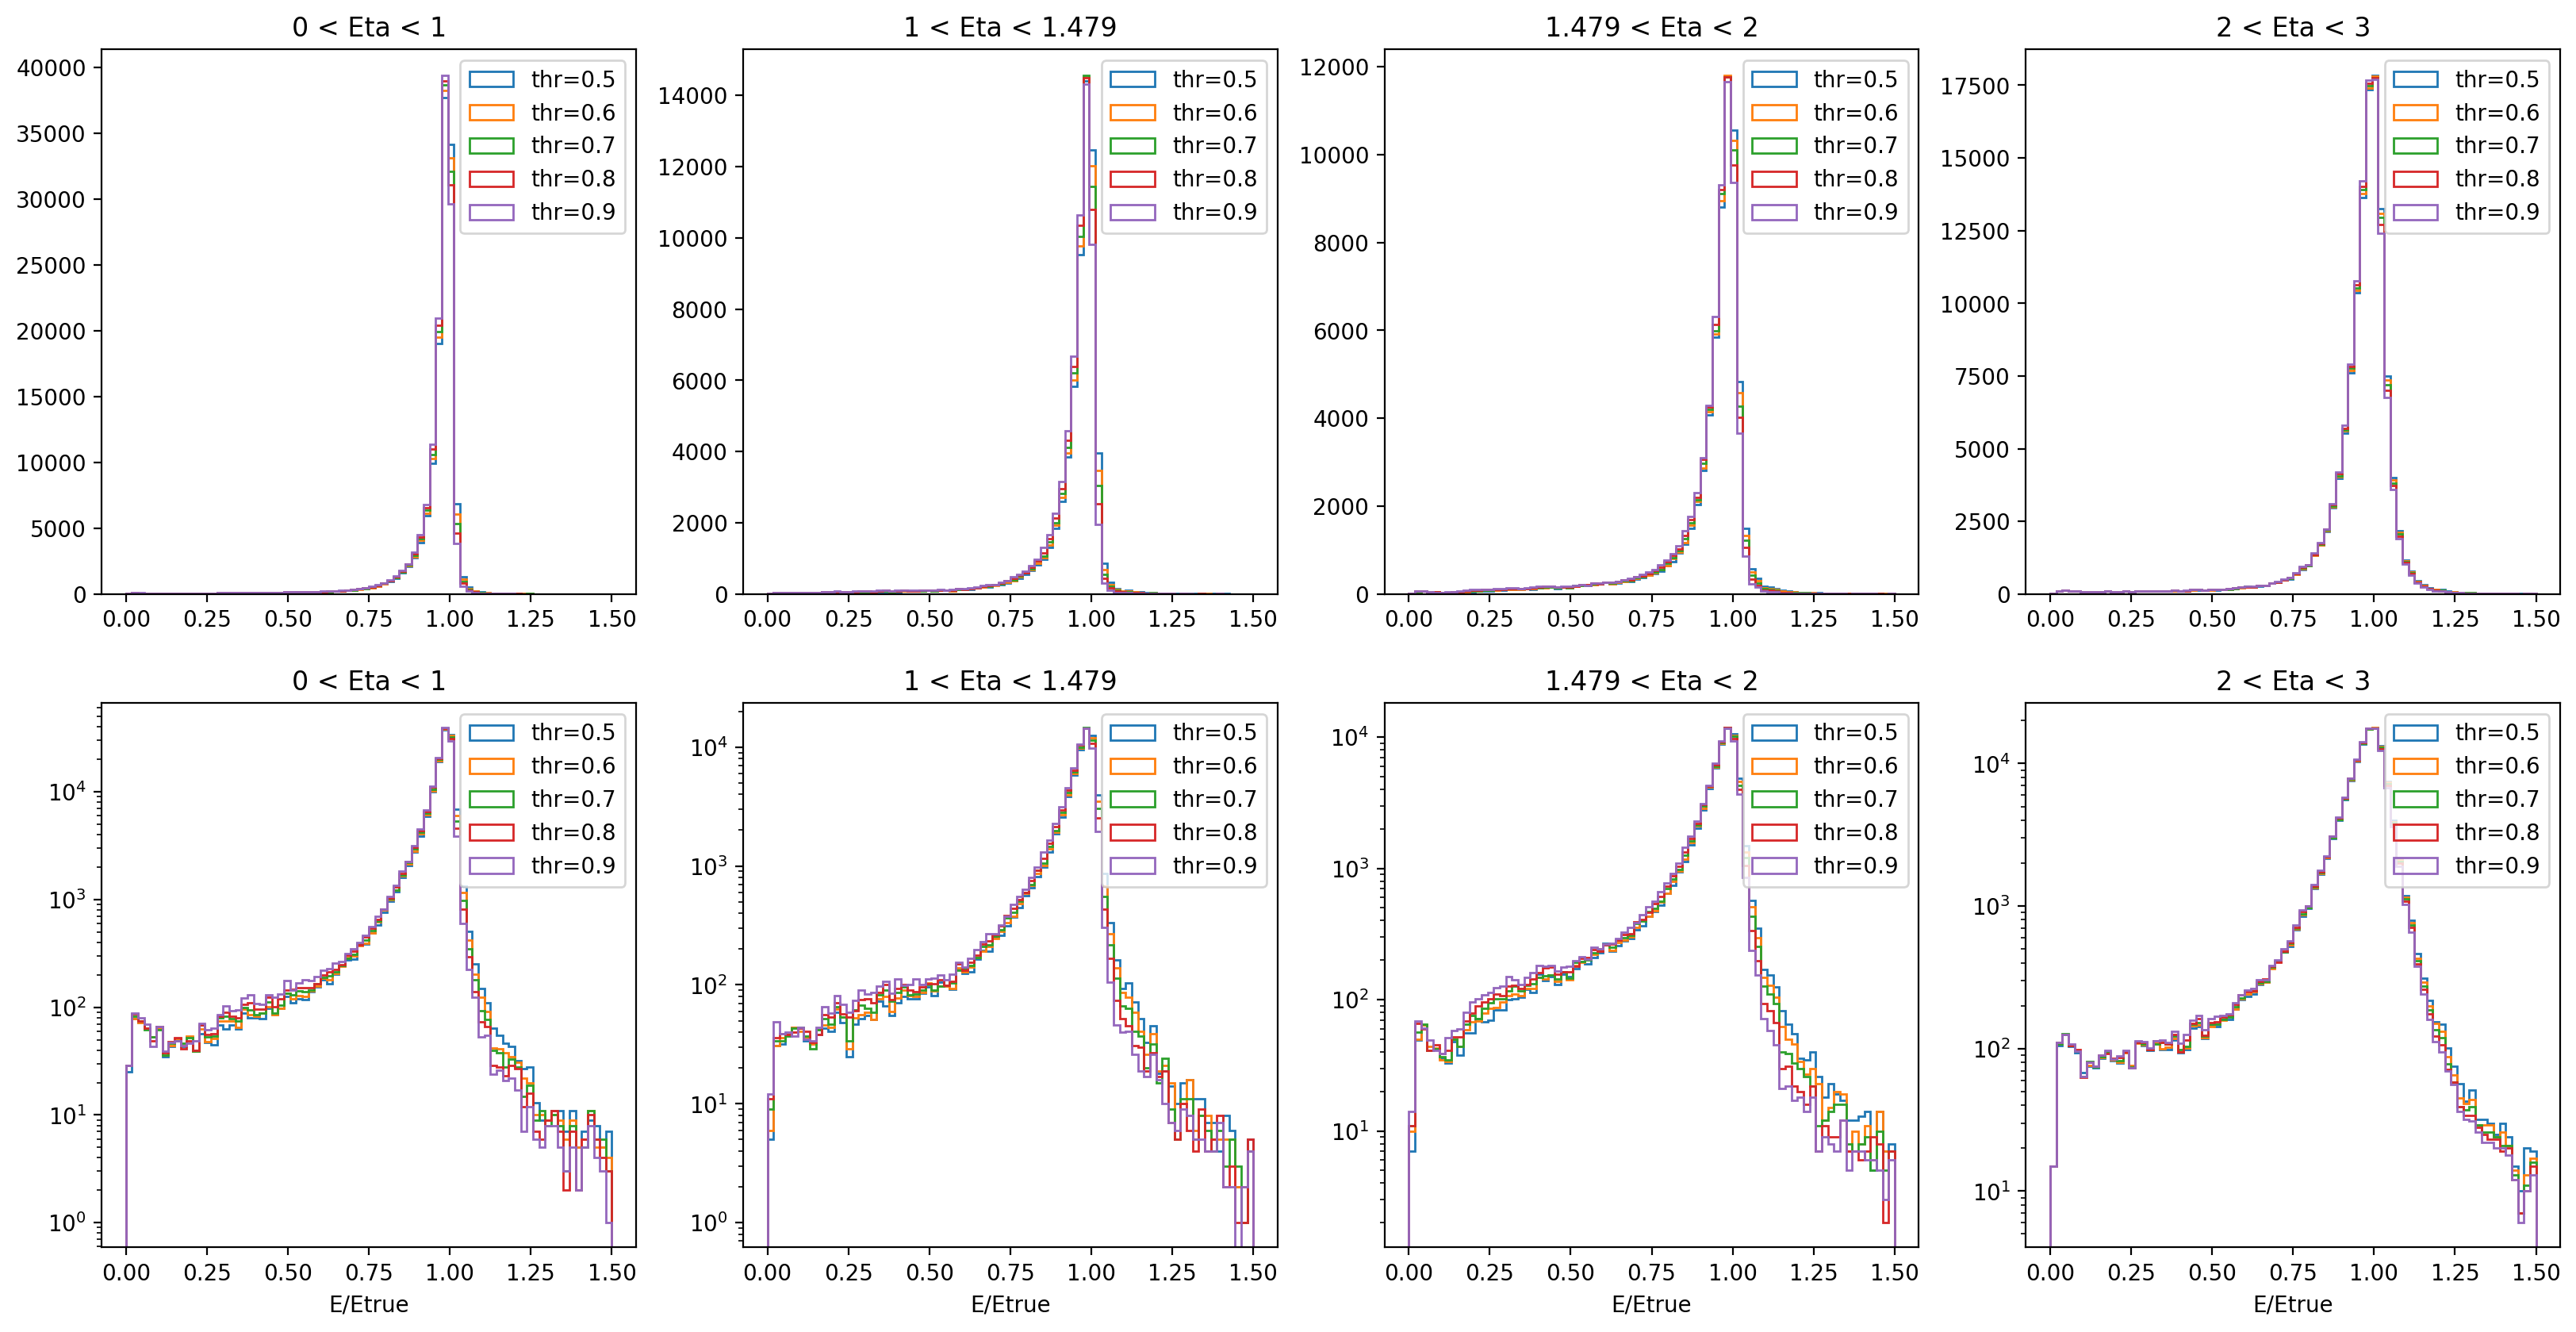

In [44]:
fig, ax = plt.subplots(2,4, figsize=(20,10),dpi=200)

etas = [ (0,1),(1,1.479),(1.479,2), (2,3)]

for j,(e1,e2) in enumerate(etas): 
    for i, thr in enumerate([0.5,0.6,0.7,0.8,0.9]):
        ax[0,j].hist(dfc[(dfc.thres==thr) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].EoEtrue,bins=80, range=(0,1.5),histtype='step', label='thr={}'.format(thr))
        ax[0,j].legend()
        ax[0,j].set_title('{} < Eta < {}'.format(e1,e2))   
        ax[1,j].hist(dfc[(dfc.thres==thr) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].EoEtrue,bins=80, range=(0,1.5),histtype='step', label='thr={}'.format(thr))
        ax[1,j].legend()
        ax[1,j].set_xlabel("E/Etrue")
        ax[1,j].set_title('{} < Eta < {}'.format(e1,e2))  
        ax[1,j].set_yscale('log')



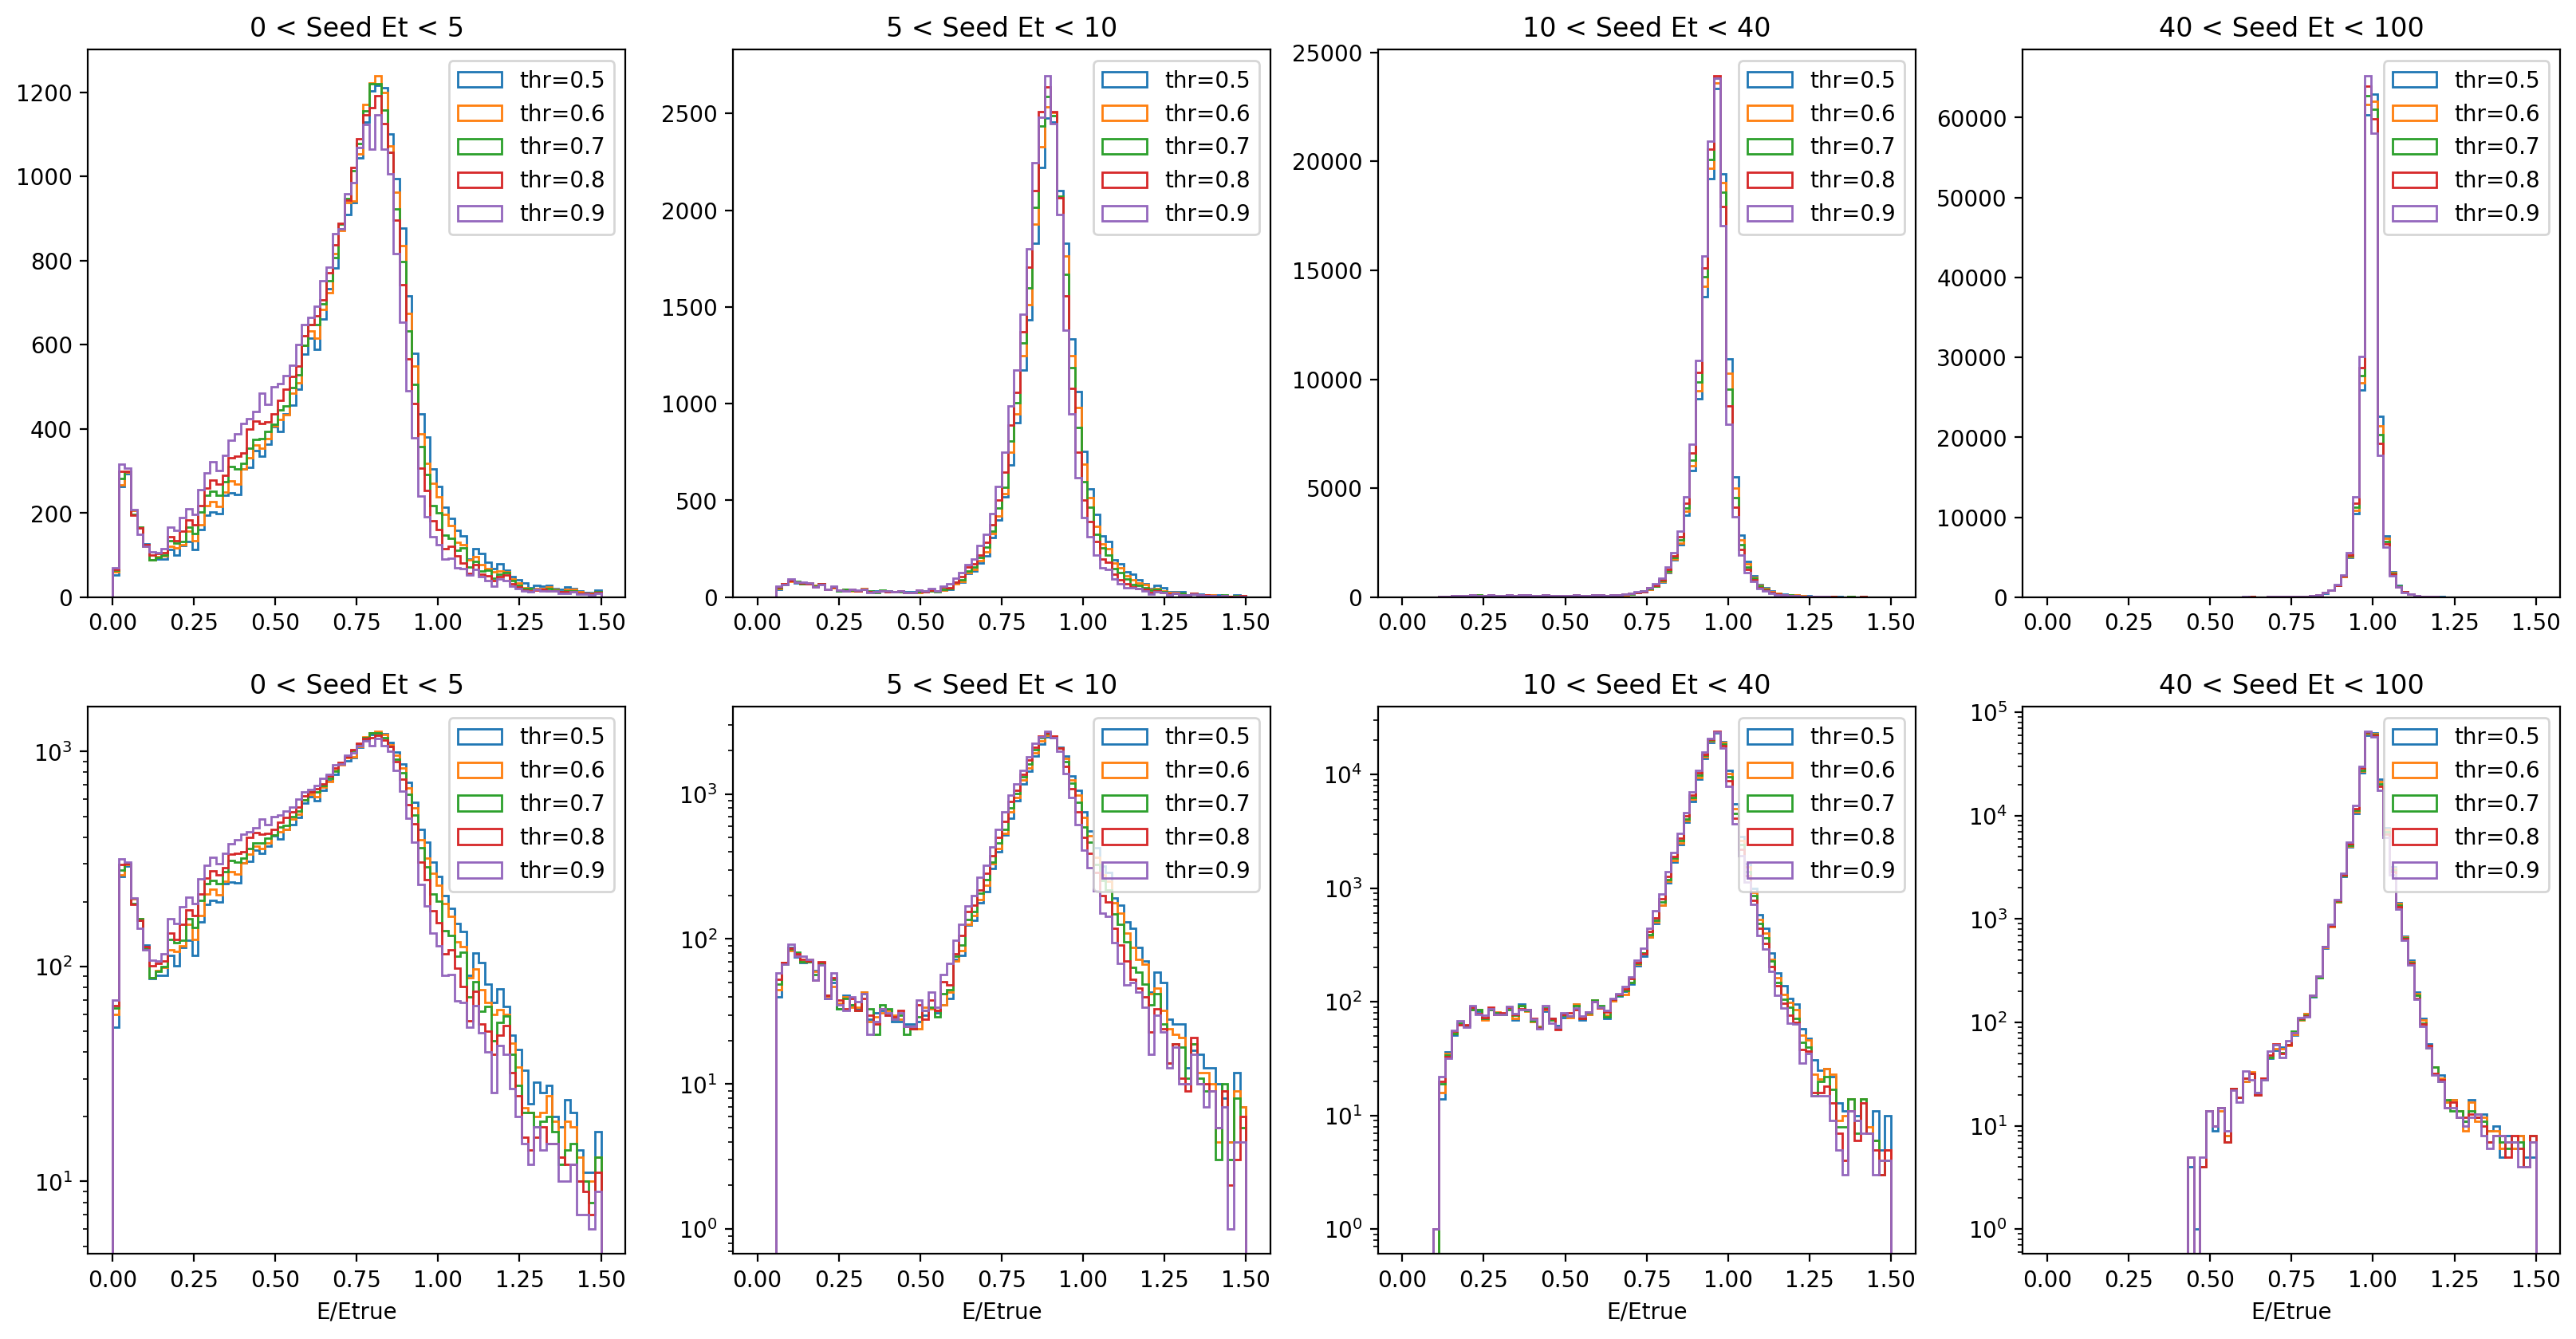

In [45]:
fig, ax = plt.subplots(2,4, figsize=(20,10),dpi=200)

ets = [ (0,5),(5,10),(10,40), (40,100)]

for j,(e1,e2) in enumerate(ets): 
    for i, thr in enumerate([0.5, 0.6,0.7,0.8,0.9]):
        ax[0,j].hist(dfc[(dfc.thres==thr) & (dfc.seed_et>=e1) & (dfc.seed_et<e2)].EoEtrue,bins=80, range=(0,1.5),histtype='step', label='thr={}'.format(thr))
        ax[0,j].legend()
        ax[0,j].set_title('{} < Seed Et < {}'.format(e1,e2))   
        ax[1,j].hist(dfc[(dfc.thres==thr) & (dfc.seed_et>=e1) & (dfc.seed_et<e2)].EoEtrue,bins=80, range=(0,1.5),histtype='step', label='thr={}'.format(thr))
        ax[1,j].legend()
        ax[1,j].set_xlabel("E/Etrue")
        ax[1,j].set_title('{} < Seed Et < {}'.format(e1,e2))  
        ax[1,j].set_yscale('log')



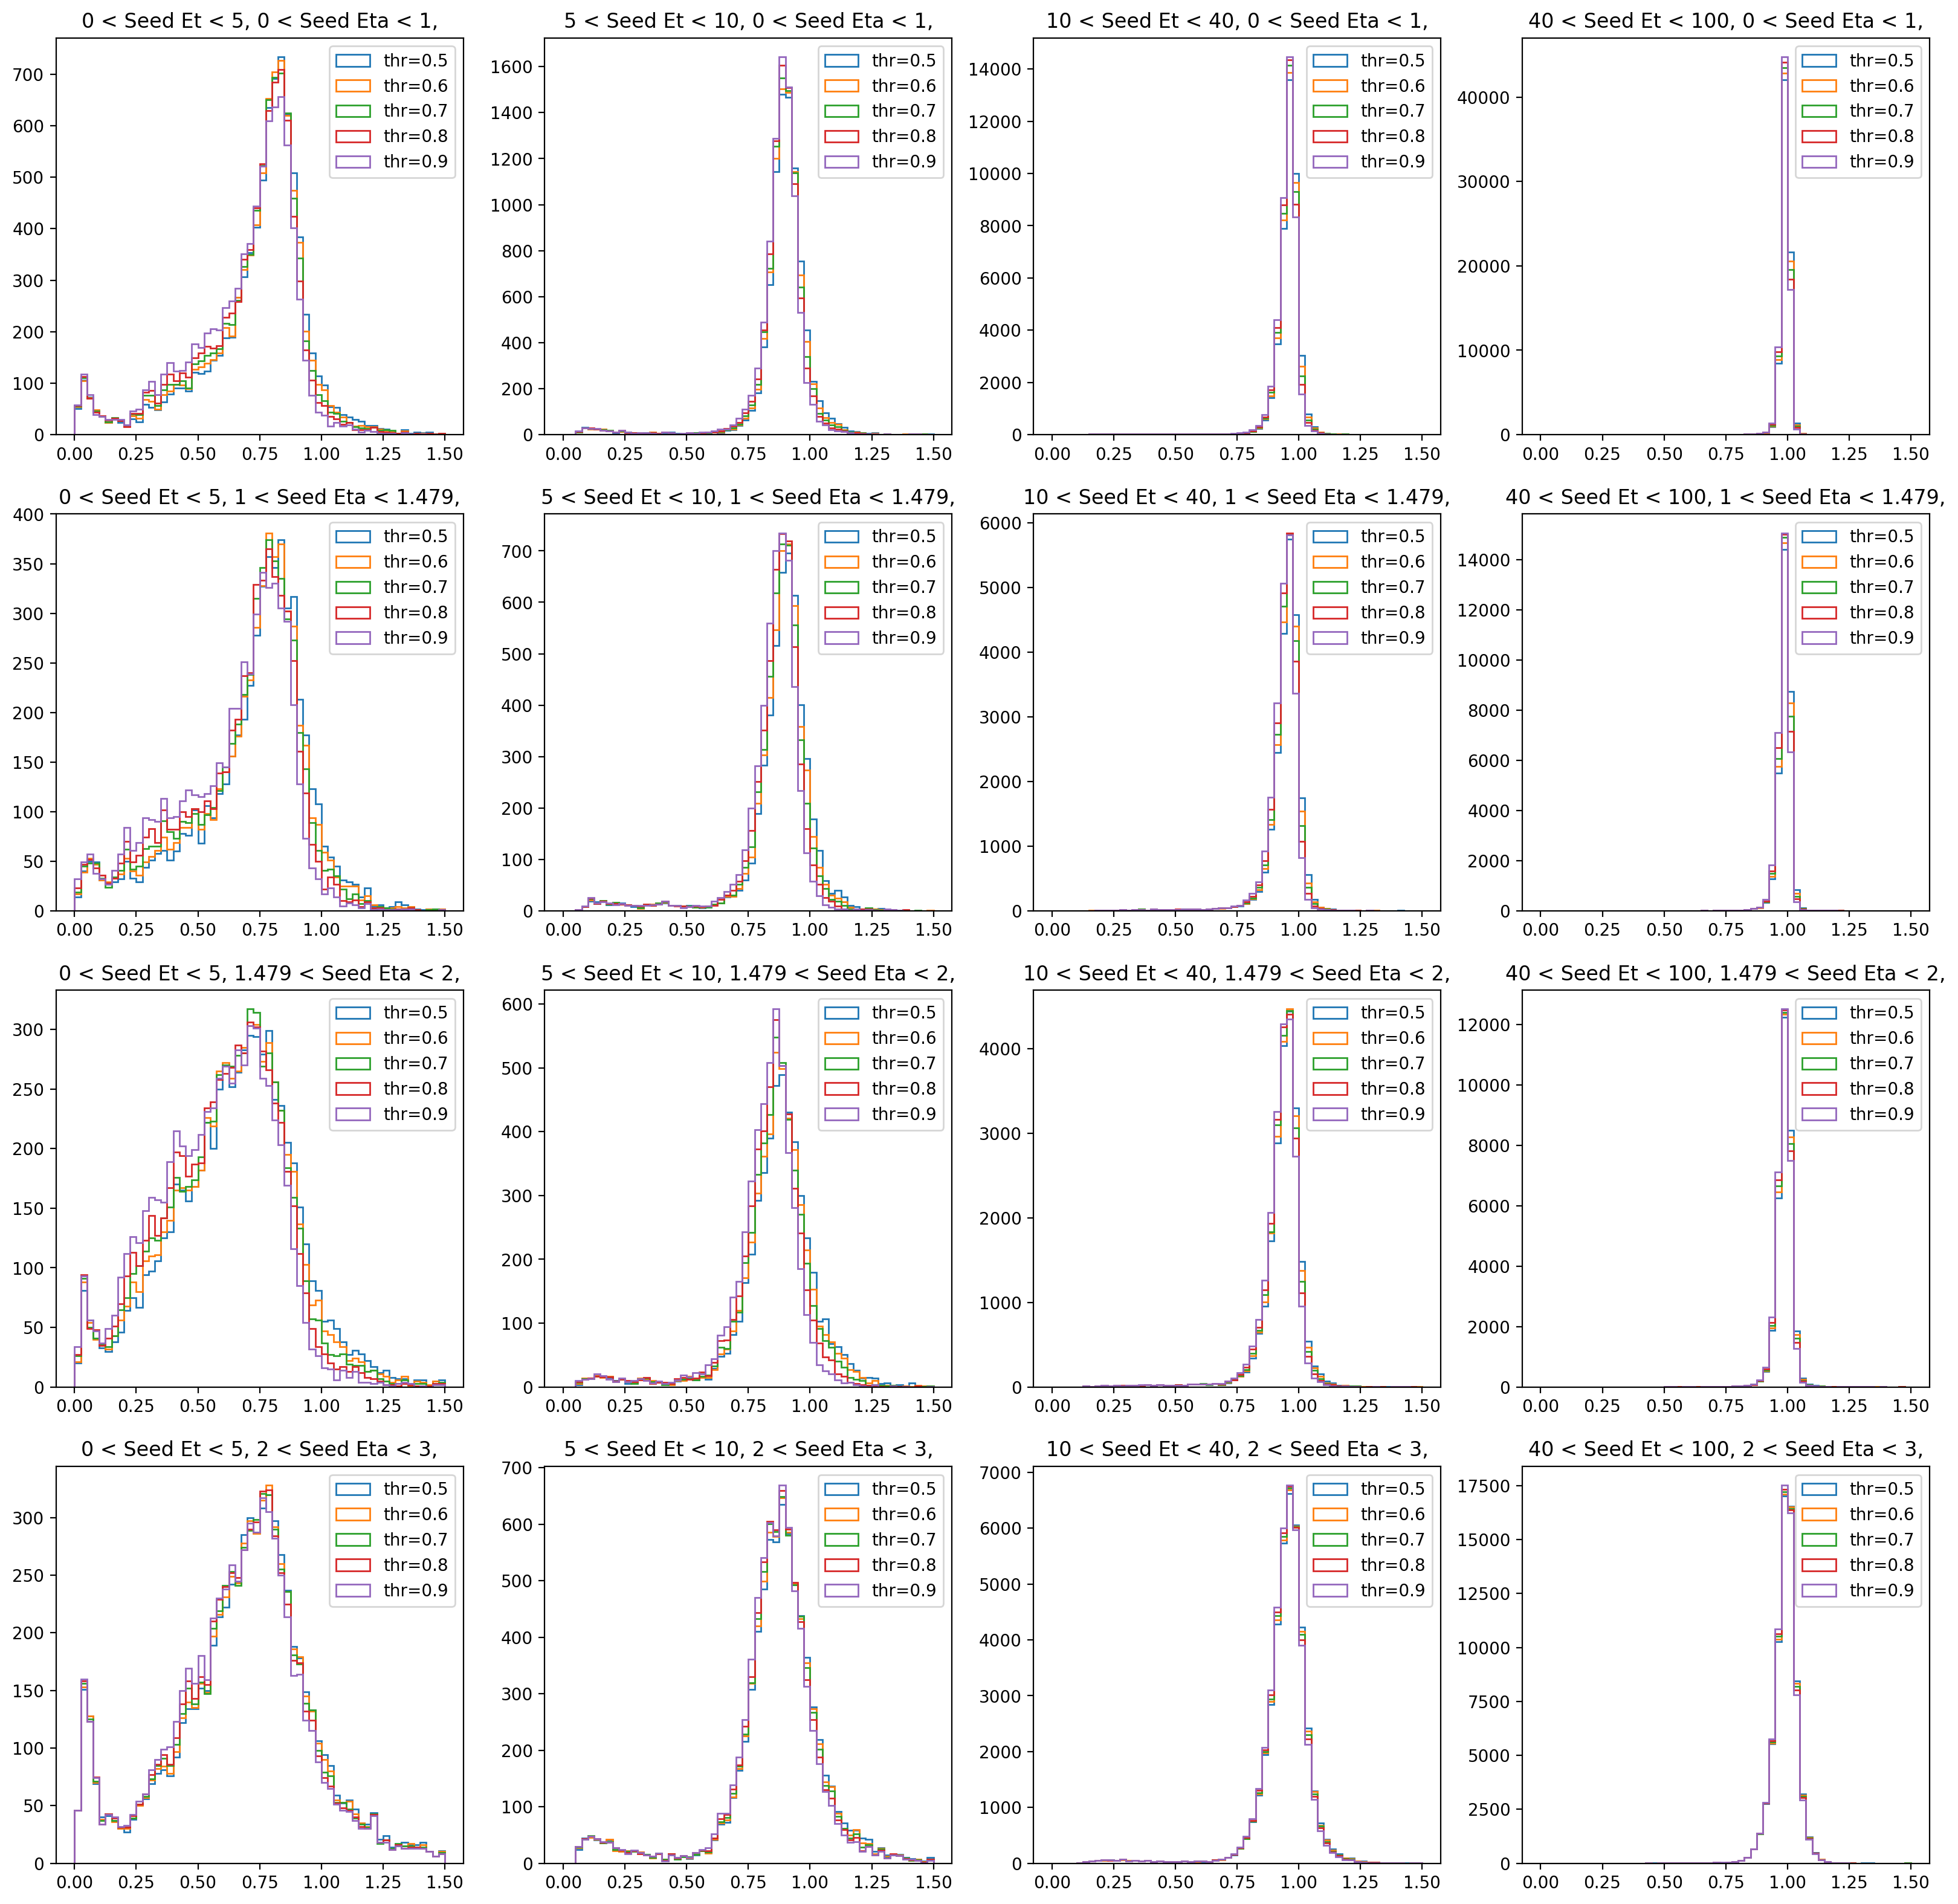

In [46]:
fig, ax = plt.subplots(4,4, figsize=(20,20),dpi=200)

ets = [ (0,5),(5,10),(10,40), (40,100)]
etas = [ (0,1),(1,1.479),(1.479,2), (2,3)]

for i,(ea1,ea2) in enumerate(etas):
    for j,(et1,et2) in enumerate(ets): 
        for thr in [0.5, 0.6,0.7,0.8,0.9]:
            ax[i,j].hist(dfc[(dfc.thres==thr) & (dfc.seed_et>=et1) & (dfc.seed_et<et2) \
                             & (abs(dfc.seed_eta)>=ea1) & (abs(dfc.seed_eta)<ea2)].EoEtrue,bins=60, range=(0,1.5),histtype='step', label='thr={}'.format(thr))
        ax[i,j].legend()
        ax[i,j].set_title('{} < Seed Et < {}, {} < Seed Eta < {},'.format(et1,et2,ea1,ea2))   


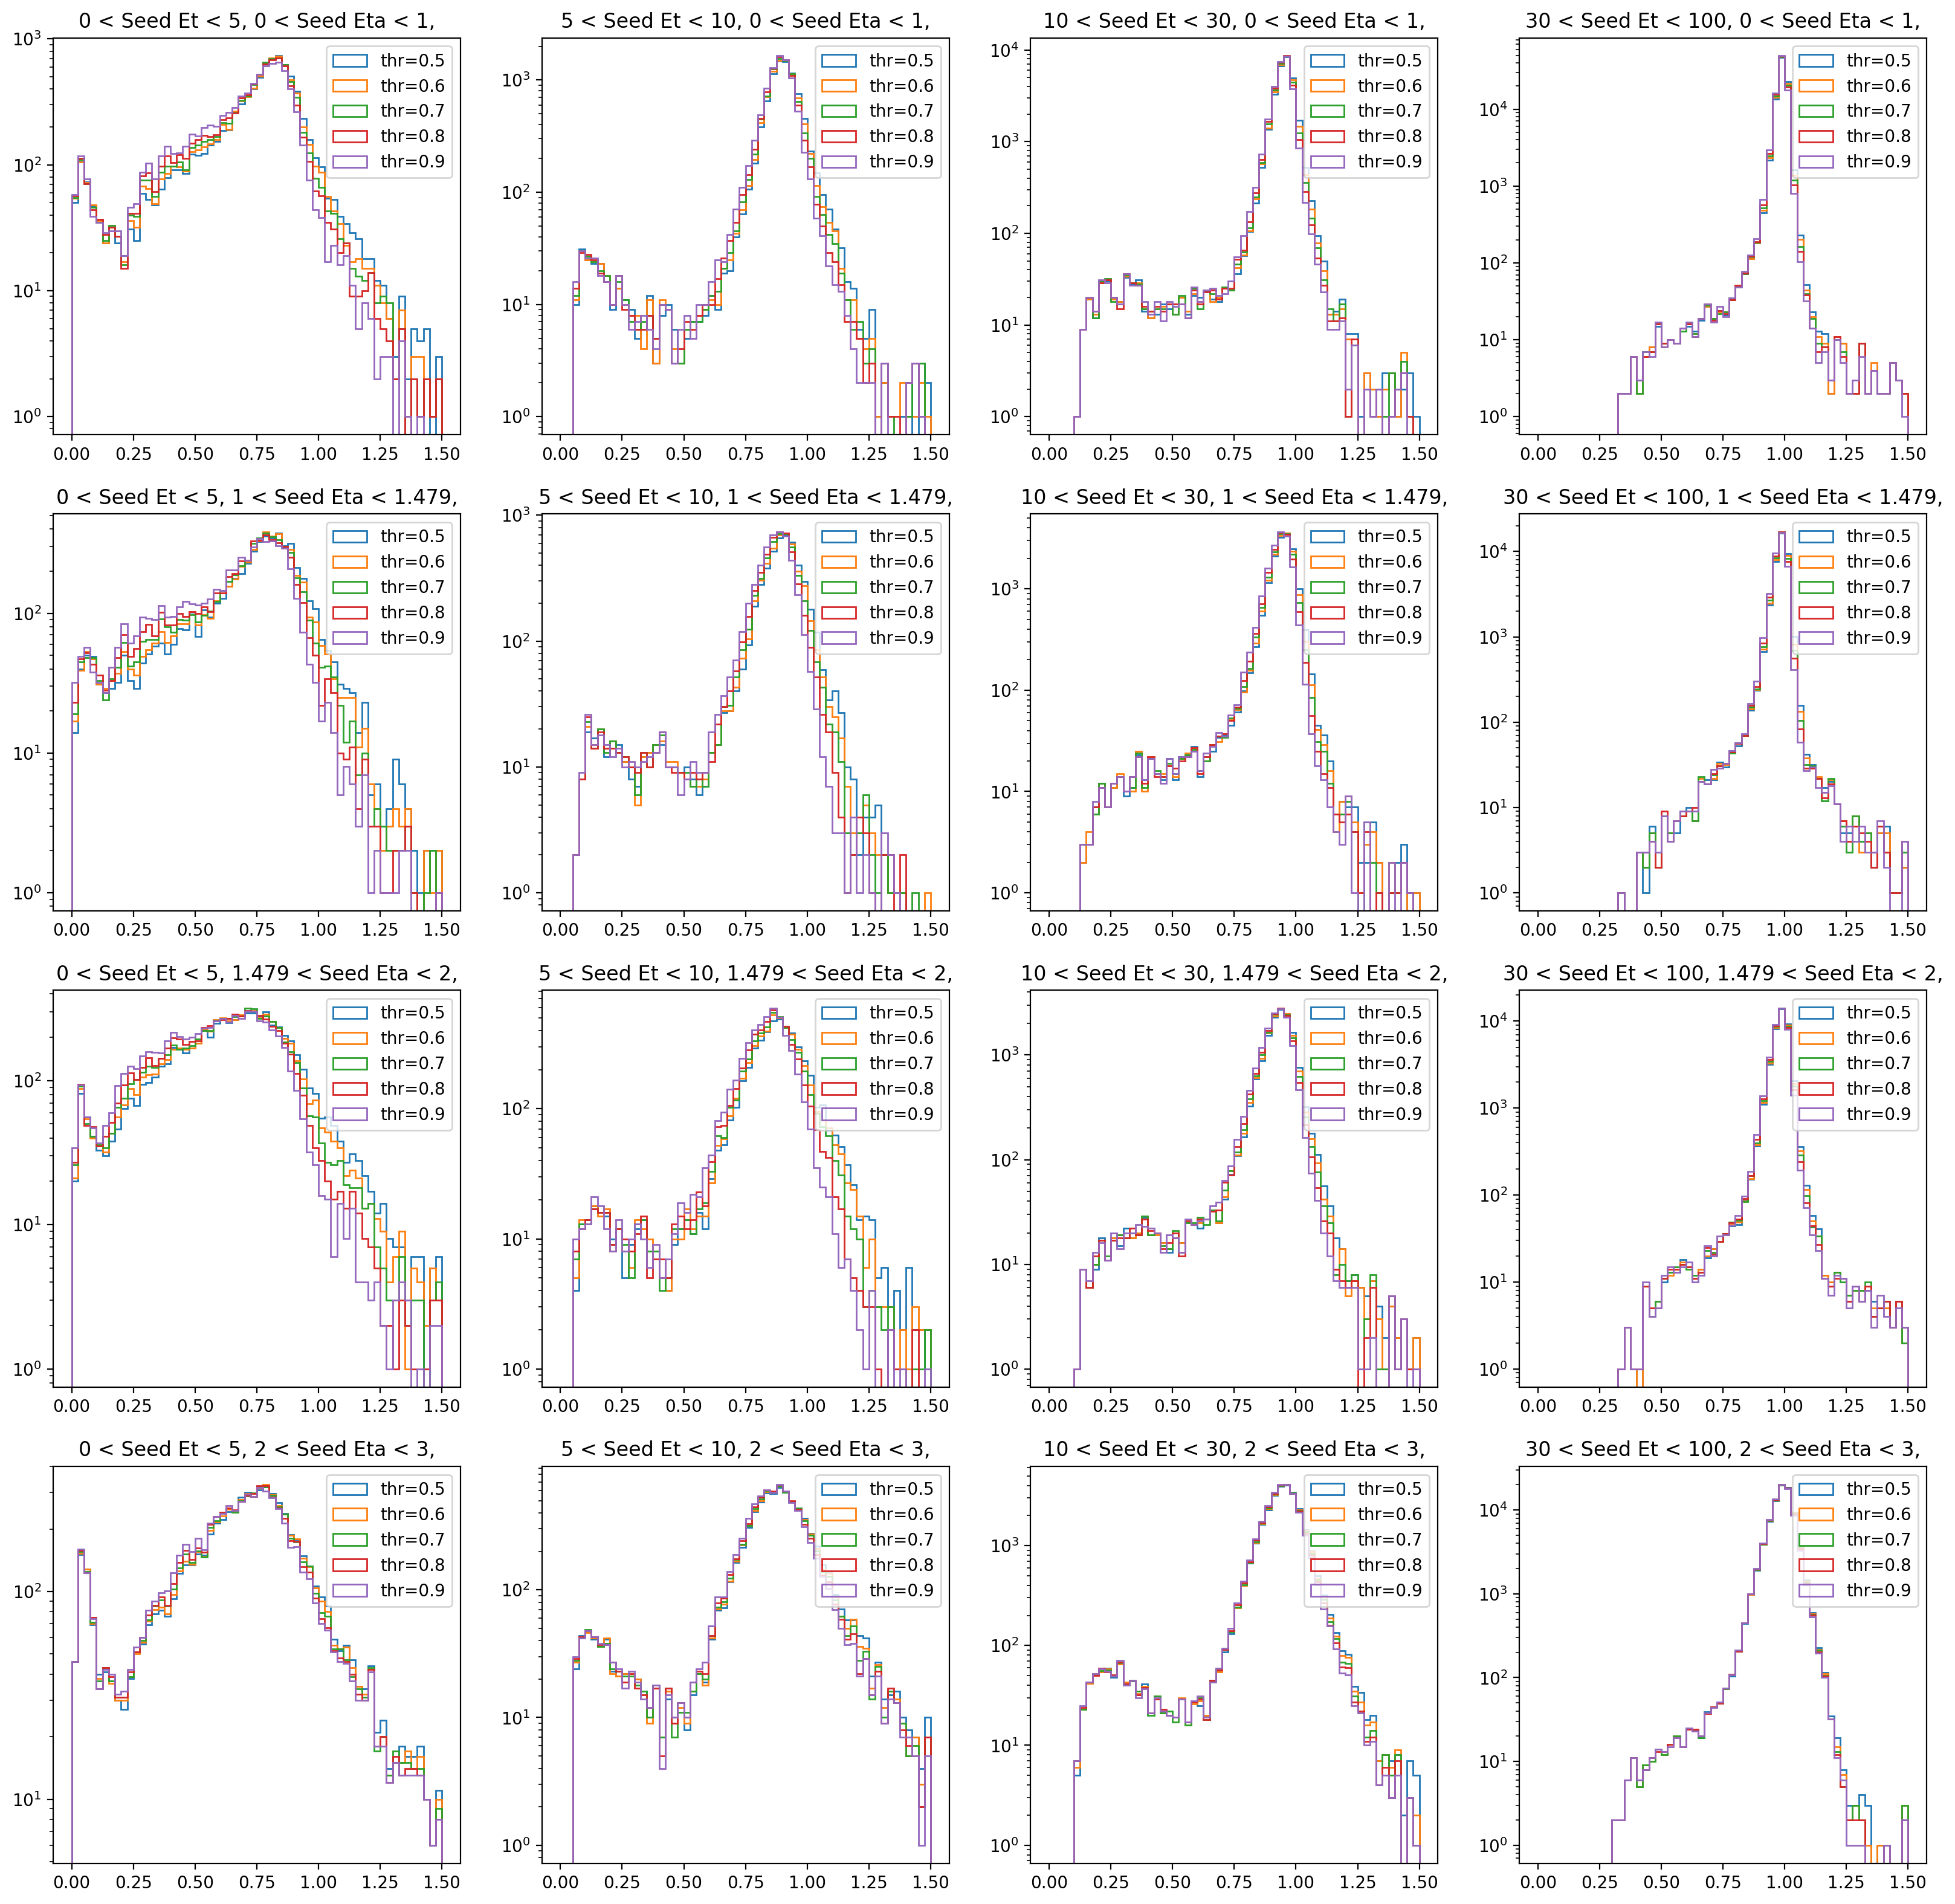

In [47]:
fig, ax = plt.subplots(4,4, figsize=(20,20),dpi=200)

ets = [ (0,5),(5,10),(10,30), (30,100)]
etas = [ (0,1),(1,1.479),(1.479,2), (2,3)]

for i,(ea1,ea2) in enumerate(etas):
    for j,(et1,et2) in enumerate(ets): 
        for thr in [0.5, 0.6,0.7,0.8,0.9]:
            ax[i,j].hist(dfc[(dfc.thres==thr) & (dfc.seed_et>=et1) & (dfc.seed_et<et2) \
                             & (abs(dfc.seed_eta)>=ea1) & (abs(dfc.seed_eta)<ea2)].EoEtrue,bins=60, range=(0,1.5),histtype='step', label='thr={}'.format(thr))
        ax[i,j].legend()
        ax[i,j].set_title('{} < Seed Et < {}, {} < Seed Eta < {},'.format(et1,et2,ea1,ea2))  
        ax[i,j].set_yscale('log')


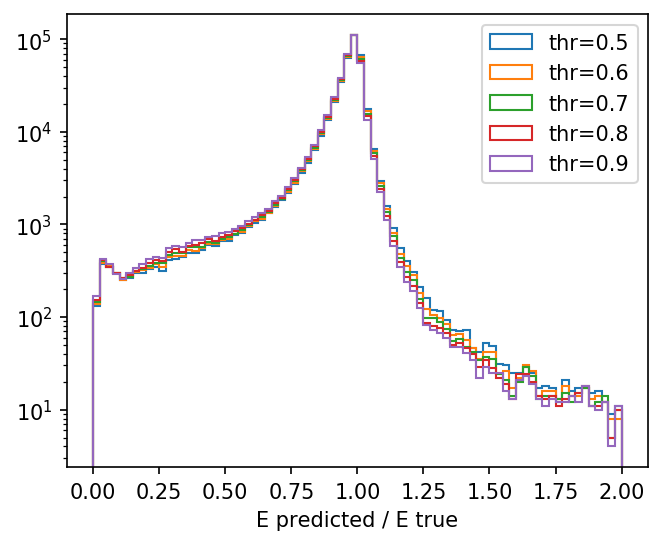

In [48]:
for thr in [0.5, 0.6,0.7,0.8,0.9]:
    plt.hist(dfc[dfc.thres==thr].EoEtrue,bins=80, range=(0,2),histtype='step', label=f'thr={thr}')

plt.xlabel("E predicted / E true")
plt.legend()
plt.yscale("log")

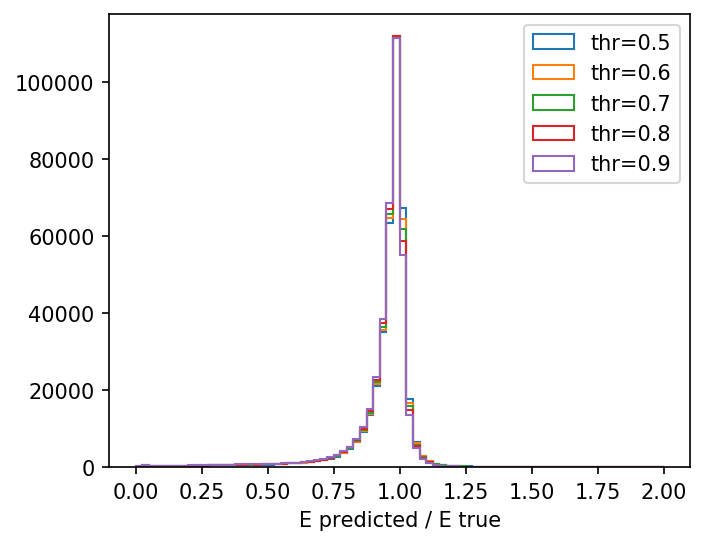

In [49]:
for thr in [0.5, 0.6,0.7,0.8,0.9]:
    plt.hist(dfc[dfc.thres==thr].EoEtrue,bins=80, range=(0,2),histtype='step', label=f'thr={thr}')

plt.xlabel("E predicted / E true")
plt.legend()

In [1]:
plt.hist(dfc[(dfc.thres==0.5) & (dfc.seed_et>50)].EoEtrue,bins=80, range=(0,2),histtype='step',label='Seed Et>50')
plt.hist(dfc[(dfc.thres==0.5) & (dfc.seed_et<=50)].EoEtrue,bins=80, range=(0,2),histtype='step',label='Seed Et<50')
plt.xlabel("E predicted / E true")
plt.yscale("log")
plt.legend()
#hep.cms.text("Simulation")
#hep.mpl_magic()

NameError: name 'plt' is not defined

Text(0.5, 0, 'N. clusters')

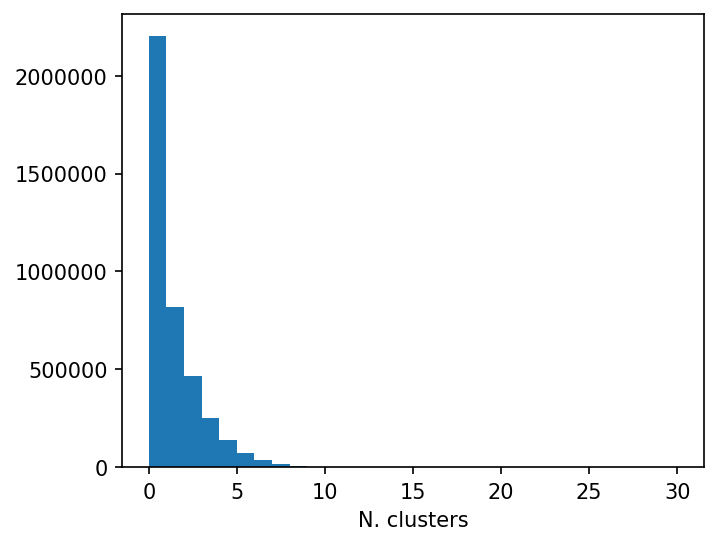

In [28]:
plt.hist(dfc.ncls, range=(0,30), bins=30)
plt.xlabel("N. clusters")

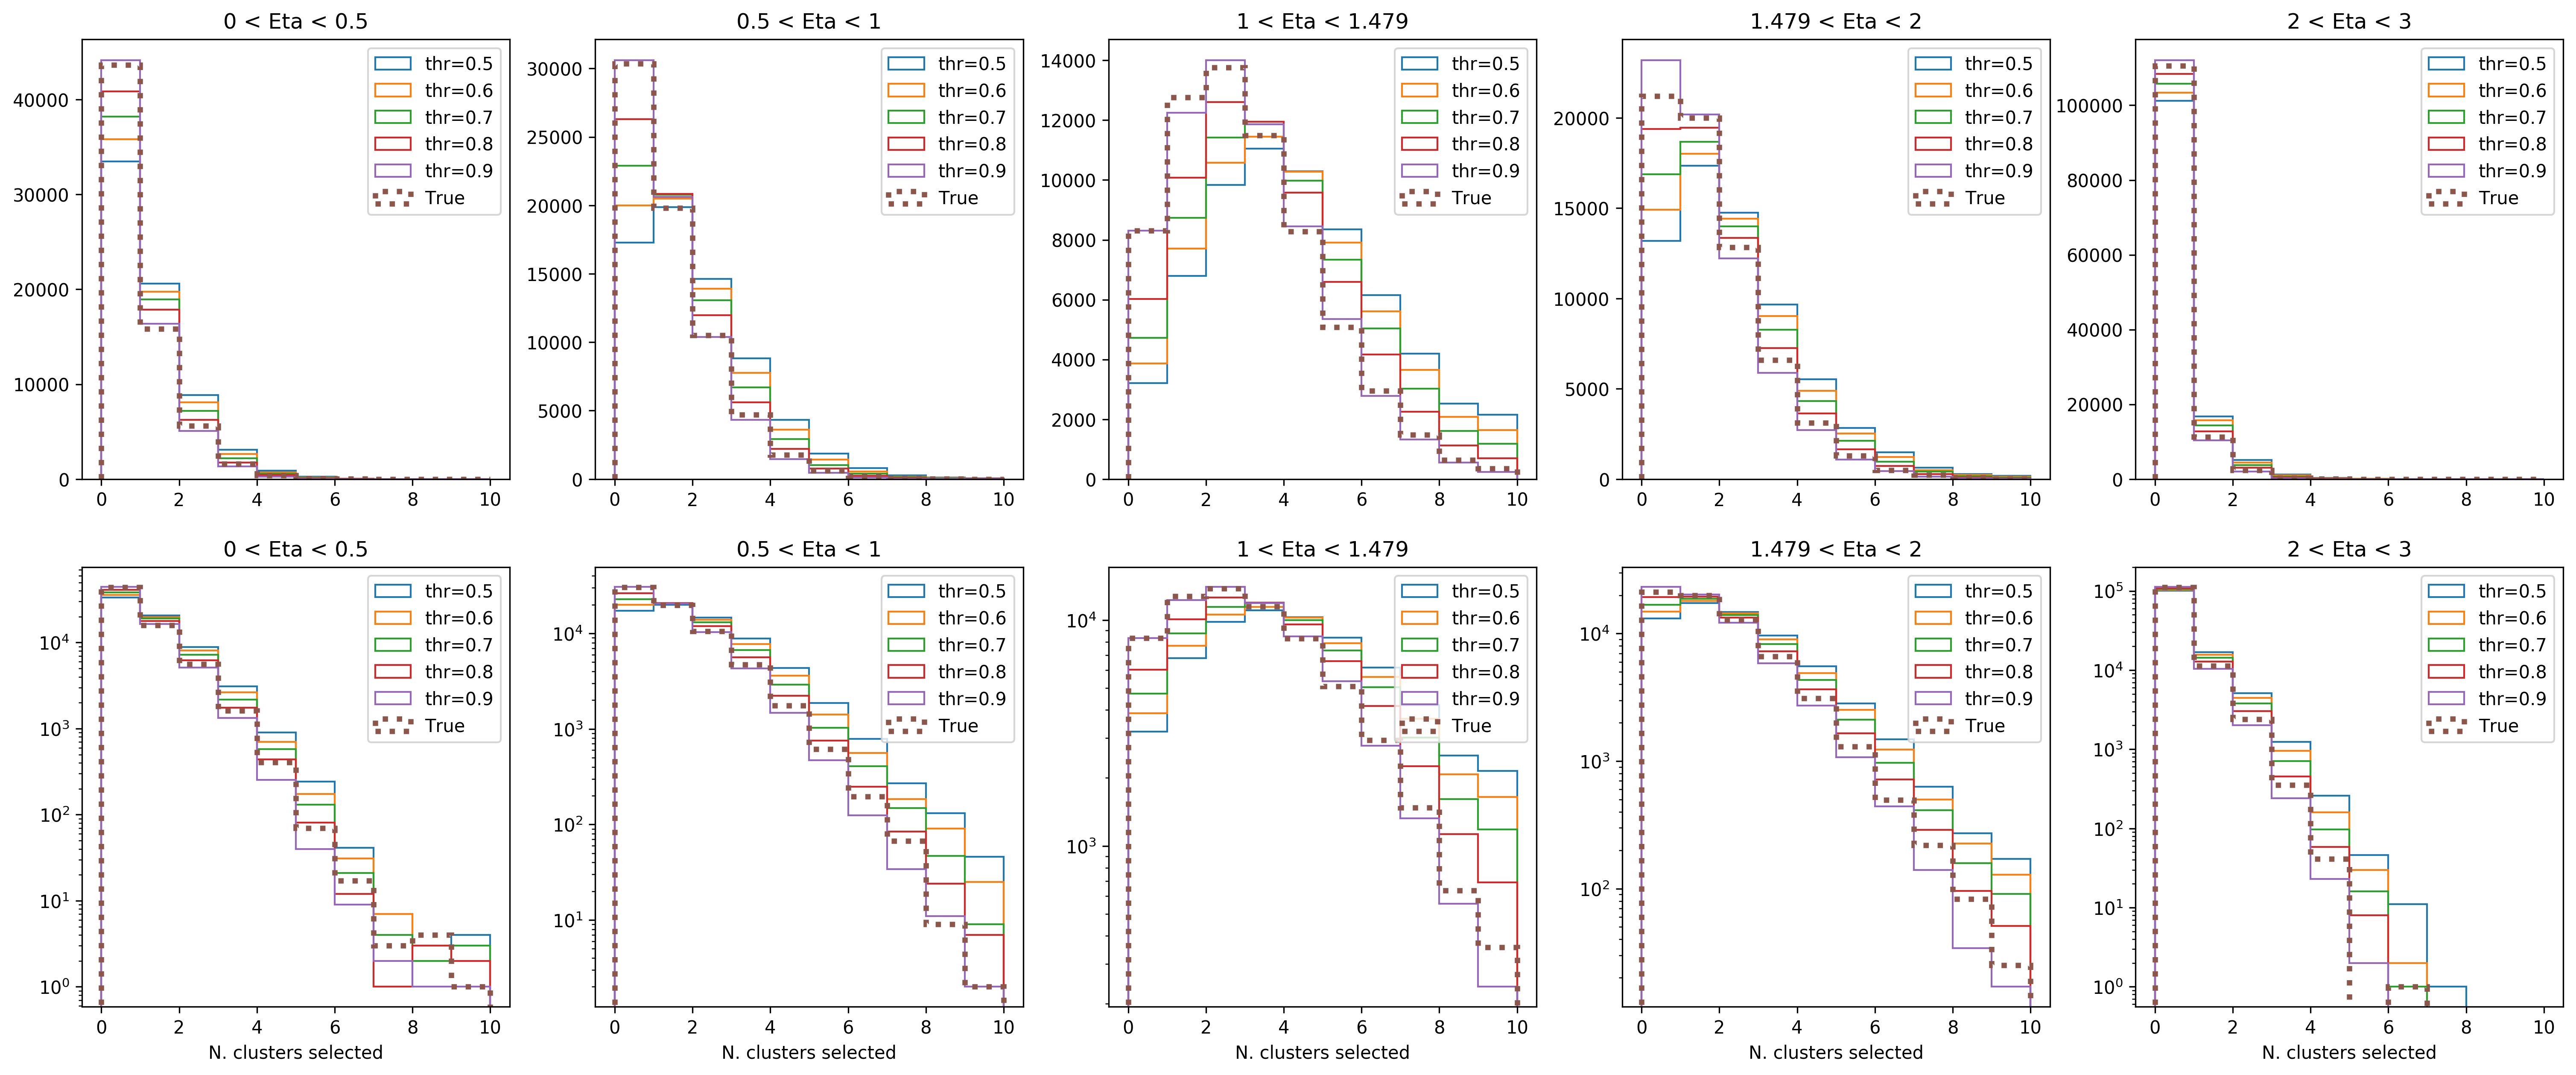

In [52]:
fig, ax = plt.subplots(2,5, figsize=(25,10),dpi=300)

etas = [ (0,0.5),(0.5,1),(1,1.479),(1.479,2), (2,3)]

for j,(e1,e2) in enumerate(etas): 
    for i, thr in enumerate([0.5, 0.6,0.7,0.8,0.9]):
        ax[0,j].hist(dfc[(dfc.thres==thr) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_sel,bins=10, range=(0,10),histtype='step', label='thr={}'.format(thr))
        ax[0,j].legend()
        ax[0,j].set_title('{} < Eta < {}'.format(e1,e2))   
        ax[1,j].hist(dfc[(dfc.thres==thr) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_sel,bins=10, range=(0,10),histtype='step', label='thr={}'.format(thr))
        
        ax[1,j].set_xlabel("N. clusters selected")
        ax[1,j].set_title('{} < Eta < {}'.format(e1,e2))  
        ax[1,j].set_yscale('log')
    ax[0,j].hist(dfc[(dfc.thres==0.6) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_true,bins=10, range=(0,10),histtype='step', label='True', linewidth=3,linestyle=':')
    ax[1,j].hist(dfc[(dfc.thres==0.6) & (abs(dfc.seed_eta)>=e1) & (abs(dfc.seed_eta)<e2)].ncls_true,bins=10, range=(0,10),histtype='step', label='True', linewidth=3,linestyle=':')
    ax[0,j].legend()
    ax[1,j].legend()

In [7]:
ets = [0,5,10,15, 20,40,60,80,100]
etas = [0, 0.4,0.8, 1.2,1.479, 1.75,2.,2.3,2.6,3]
ncls = [0,2,3,5,10,15,20,25,30,35,50]

def plot_eteta2D(data, title, zlabel="",**kwargs):

    a = data.values.reshape((len(etas)-1,len(ets)-1))

    plt.figure(figsize=(10,5))
    plt.imshow(a.T,**kwargs)
    plt.xlabel("Seed $\eta$")
    plt.ylabel("Seed $E_T$")
    plt.title(title)
    plt.colorbar(label=zlabel)

    plt.yticks(np.arange(len(ets)-1), ets)
    plt.xticks(np.arange(len(etas)-1), etas)

    locs, labels= plt.xticks()
    labels.append(etas[-1])
    locs = np.append(locs, [len(etas)-1])
    plt.xticks(locs-0.5, labels)

    locs, labels= plt.yticks()
    labels.append(ets[-1])
    locs = np.append(locs, [len(ets)-1])
    plt.yticks(locs-0.5, labels)

def plot_nclseta2D(data, title, zlabel="", **kwargs):

    a = data.values.reshape((len(etas)-1,len(ncls)-1))

    plt.figure(figsize=(10,5))
    plt.imshow(a.T, **kwargs)
    plt.xlabel("Seed $\eta$")
    plt.ylabel("N. clusters")
    plt.title(title)
    plt.colorbar(label=zlabel)

    plt.yticks(np.arange(len(ncls)-1), ncls)
    plt.xticks(np.arange(len(etas)-1), etas)

    locs, labels= plt.xticks()
    labels.append(etas[-1])
    locs = np.append(locs, [len(etas)-1])
    plt.xticks(locs-0.5, labels)

    locs, labels= plt.yticks()
    labels.append(ncls[-1])
    locs = np.append(locs, [len(ncls)-1])
    plt.yticks(locs-0.5, labels)

# Resolution plots

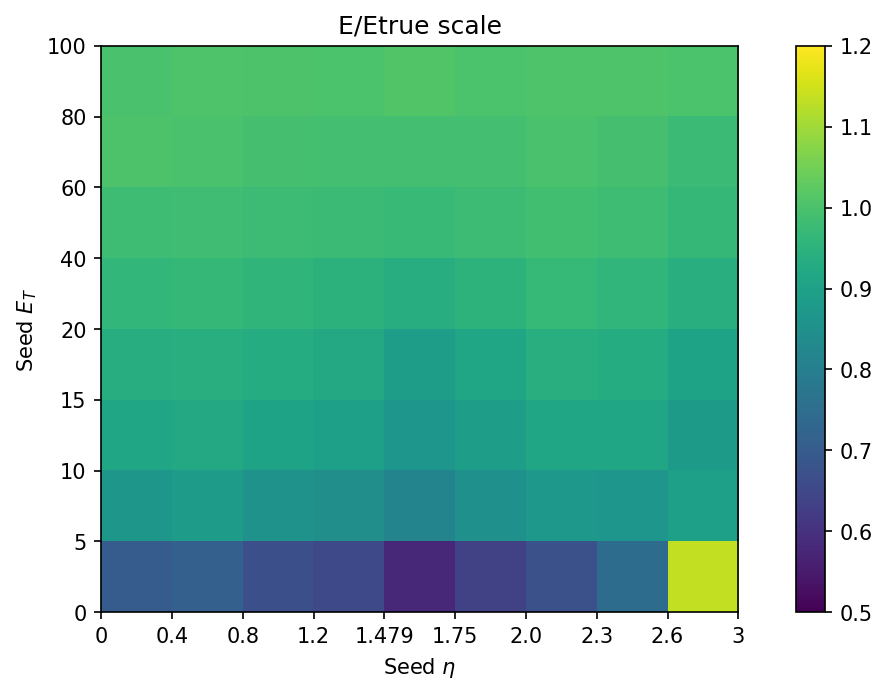

In [83]:
result =  dfc[(dfc.thres==0.8) & (dfc.Etrue>1)].groupby(["eta_bin", "et_bin"]).EoEtrue.mean()

plot_eteta2D(result,"E/Etrue scale", vmin=0.5, vmax=1.2)

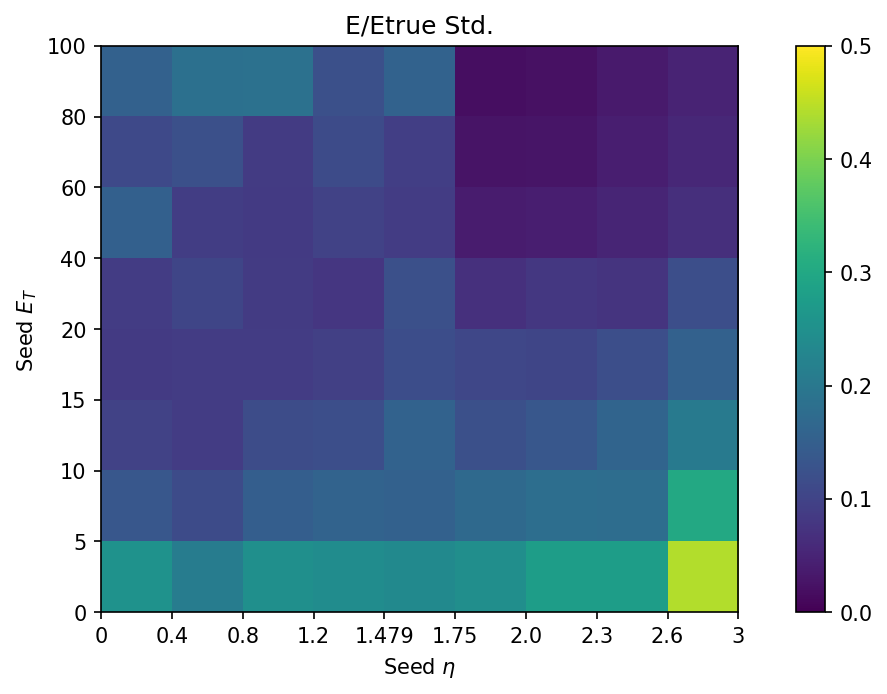

In [84]:
result =  dfc[(dfc.thres==0.8)& (dfc.Etrue>5)].groupby(["eta_bin", "et_bin"]).EoEtrue.std()

plot_eteta2D(result,"E/Etrue Std.", vmin=0, vmax=0.5)

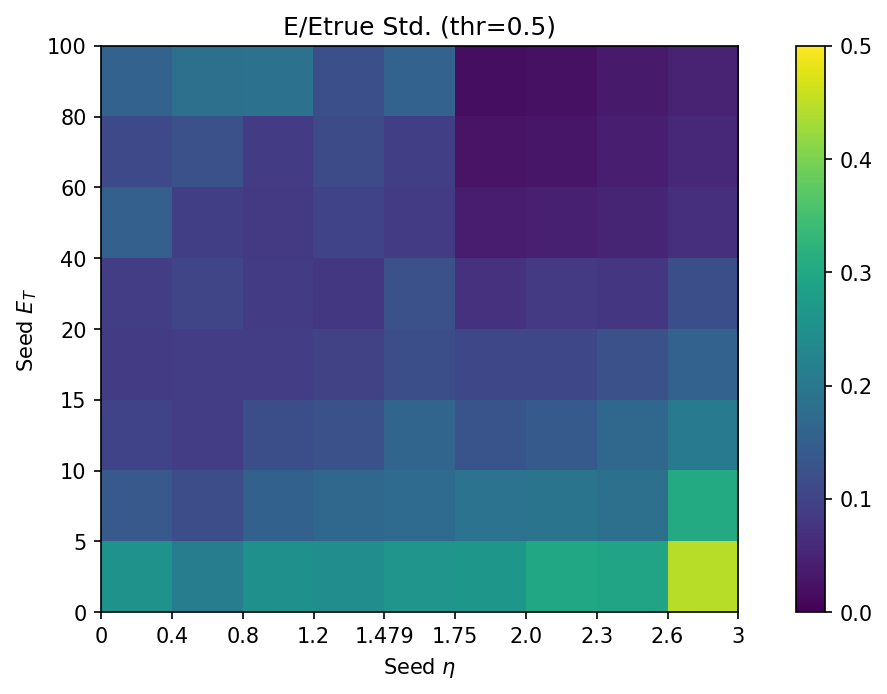

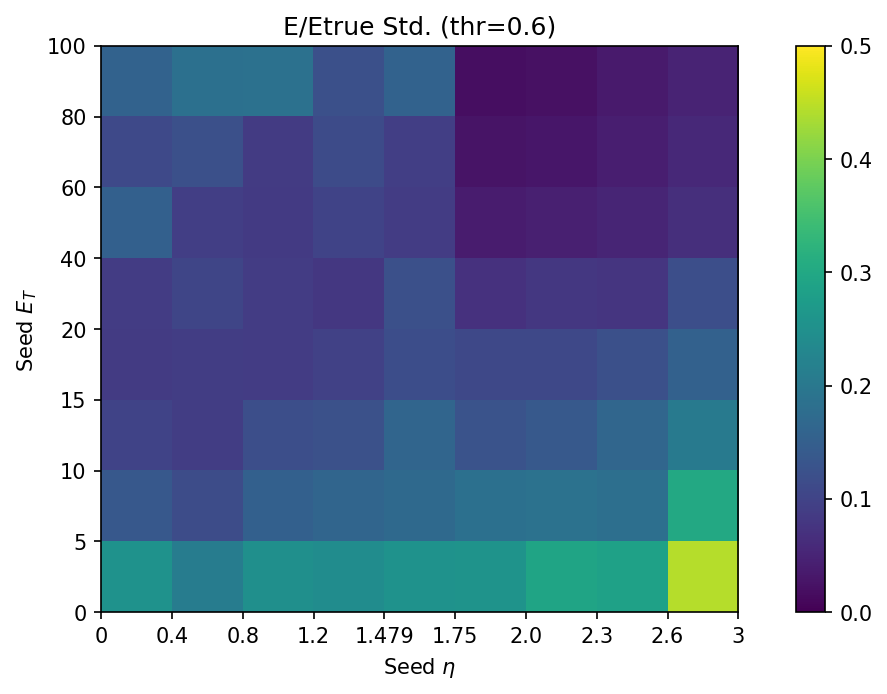

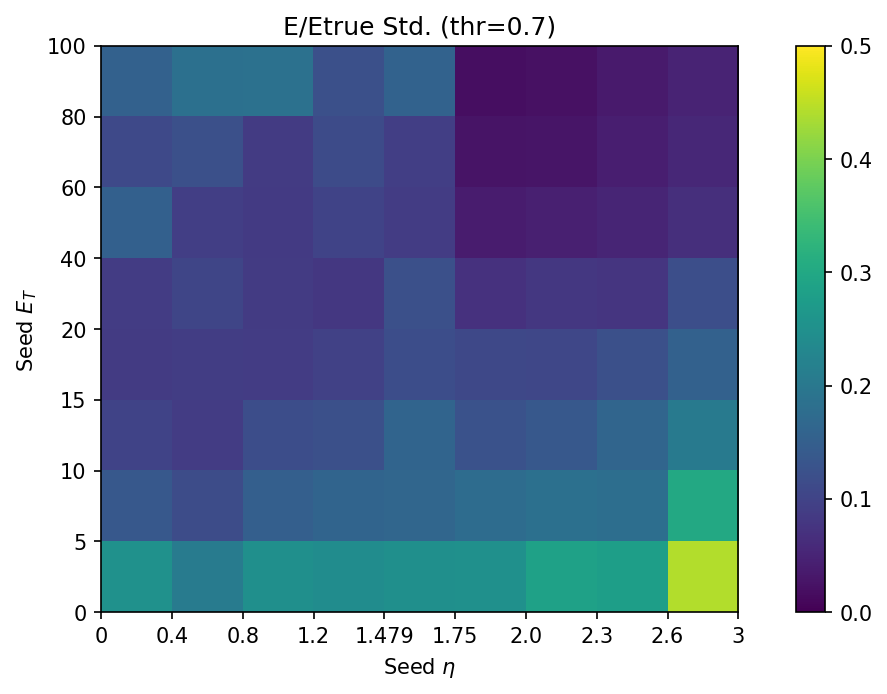

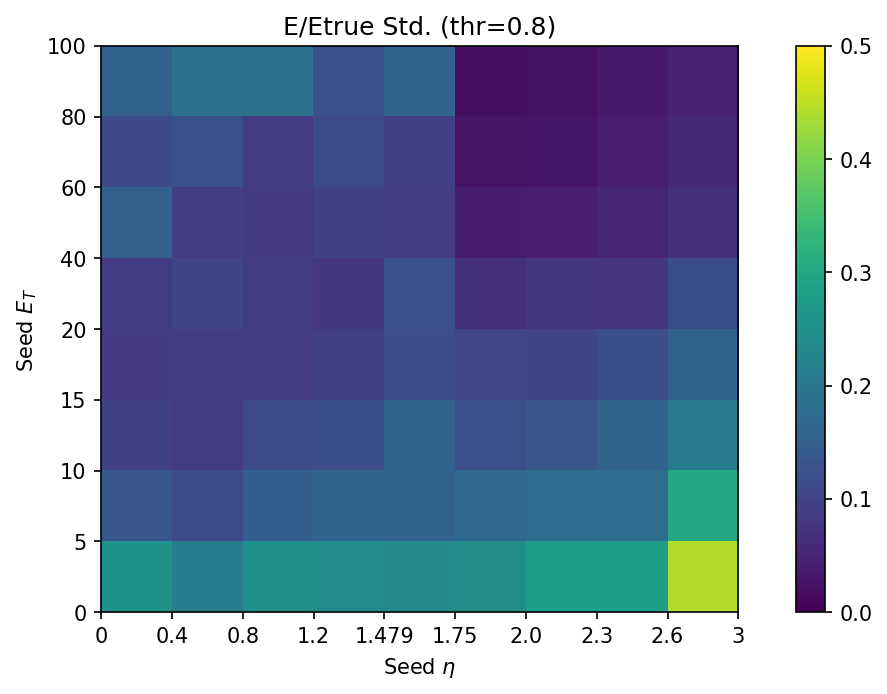

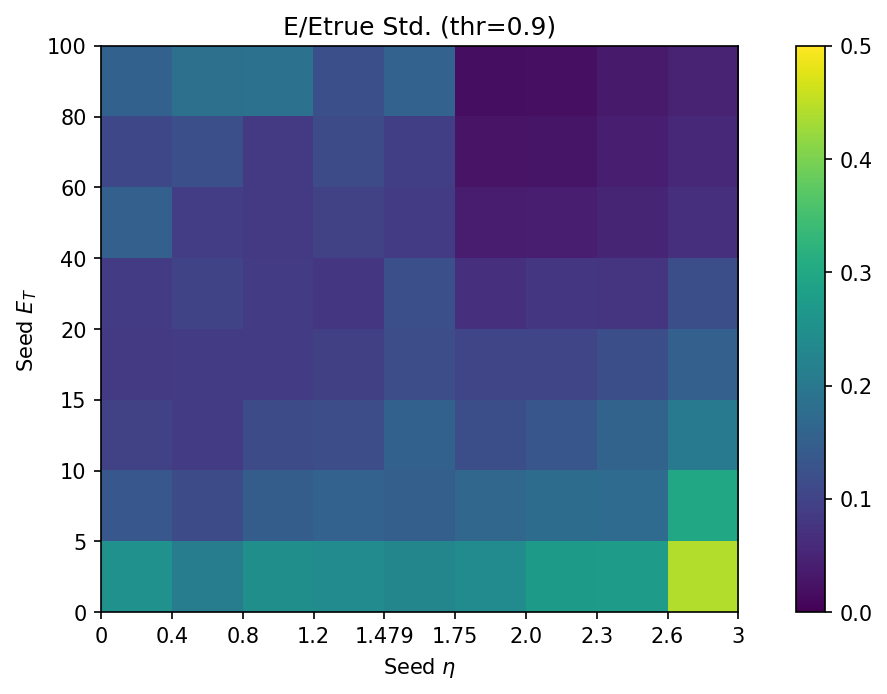

In [85]:
for i, thr in enumerate([0.5, 0.6,0.7,0.8,0.9]):
    
    result =  dfc[(dfc.thres==thr)& (dfc.Etrue>5)].groupby(["eta_bin", "et_bin"]).EoEtrue.std()
    plot_eteta2D(result,f"E/Etrue Std. (thr={thr})", vmin=0, vmax=0.5)

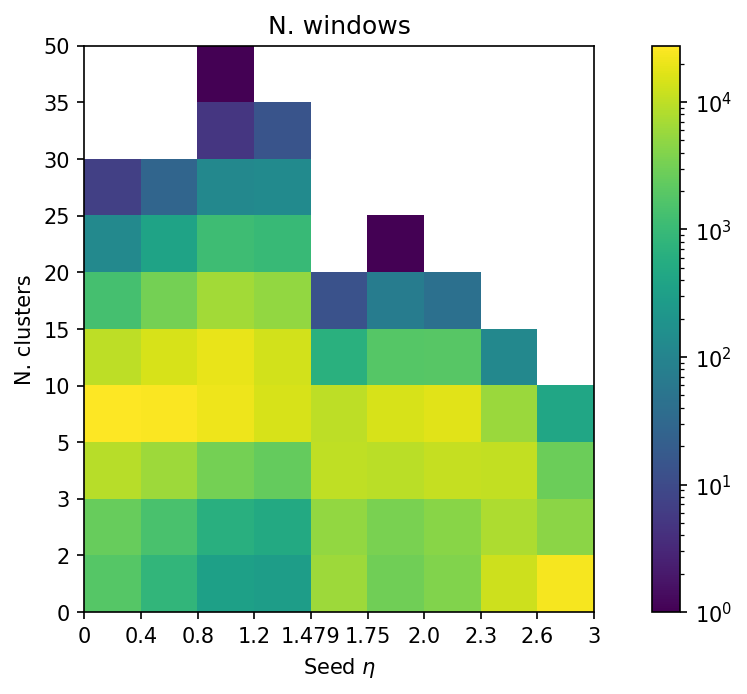

In [86]:
result =  dfc[(dfc.thres==0.8) & (dfc.Etrue>4)].groupby(["eta_bin", "ncls_bin"]).EoEtrue.count()

plot_nclseta2D(result,"N. windows", norm=colors.LogNorm())

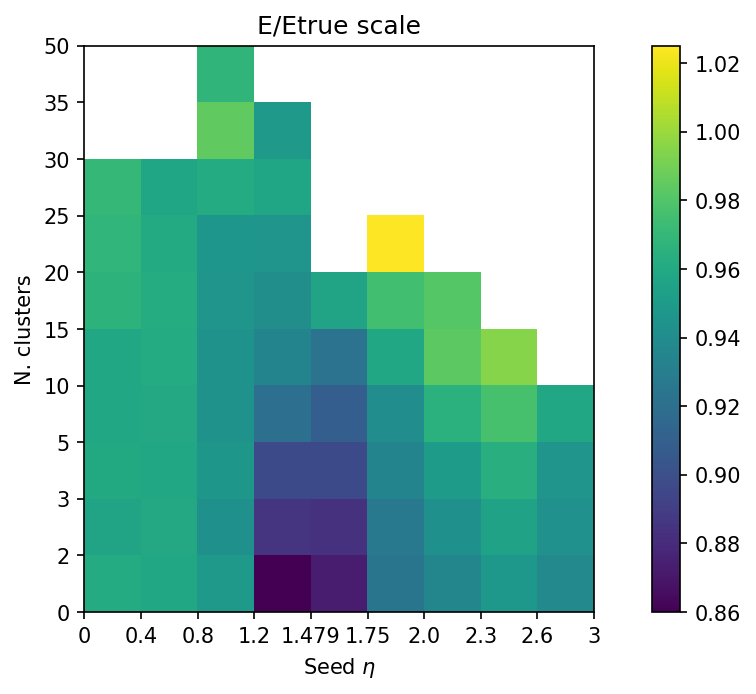

In [87]:
result =  dfc[(dfc.thres==0.8) & (dfc.Etrue>4)].groupby(["eta_bin", "ncls_bin"]).EoEtrue.mean()

plot_nclseta2D(result,"E/Etrue scale", vmin=0.86, vmax=1.025)

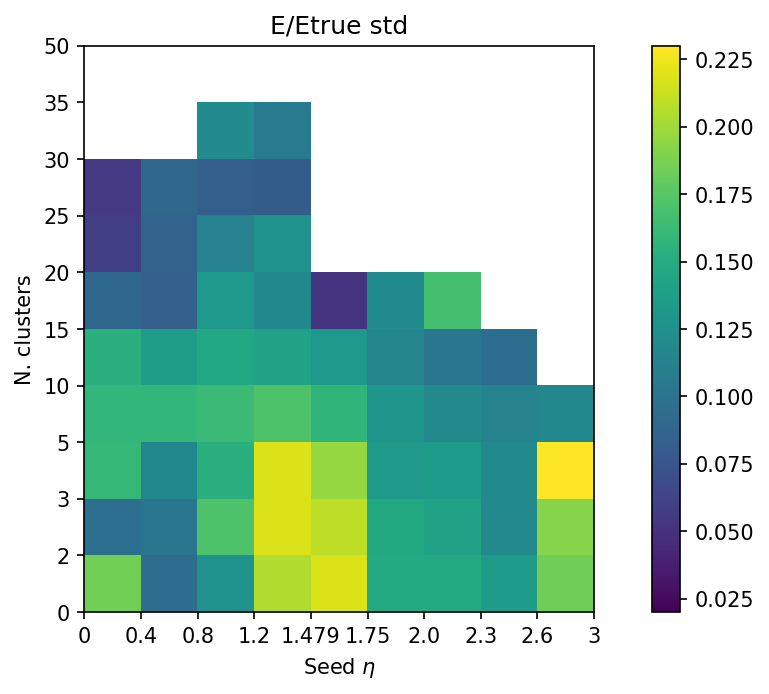

In [88]:
result =  dfc[(dfc.thres==0.8) & (dfc.Etrue>4)].groupby(["eta_bin", "ncls_bin"]).EoEtrue.std()

plot_nclseta2D(result,"E/Etrue std", vmin=0.02, vmax=0.23)

# Classification metric

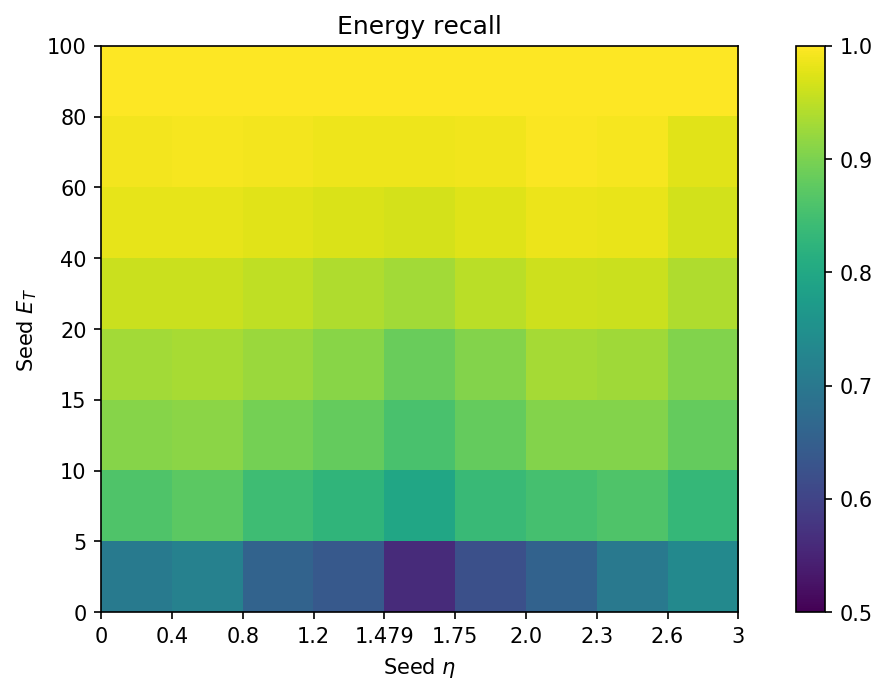

In [89]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4)].groupby(["eta_bin", "et_bin"]).apply( lambda gr:  (gr.E_tp / gr.Etrue).mean())
plot_eteta2D(result,"Energy recall",vmin=0.5, vmax=1)

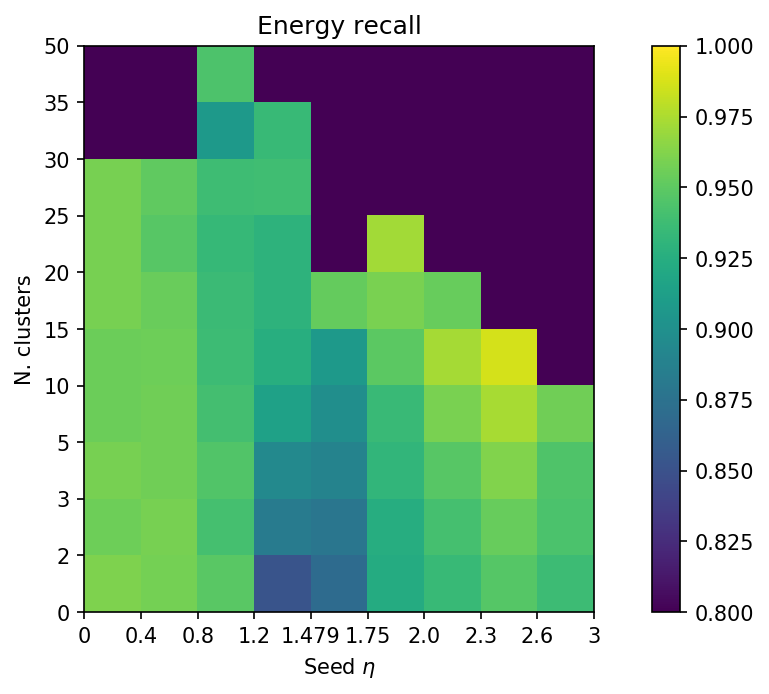

In [90]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4)].groupby(["eta_bin", "ncls_bin"]).apply( lambda gr:  (gr.E_tp / gr.Etrue).mean()).unstack(fill_value=0).stack()
plot_nclseta2D(result,"Energy recall", vmin=0.8, vmax=1)

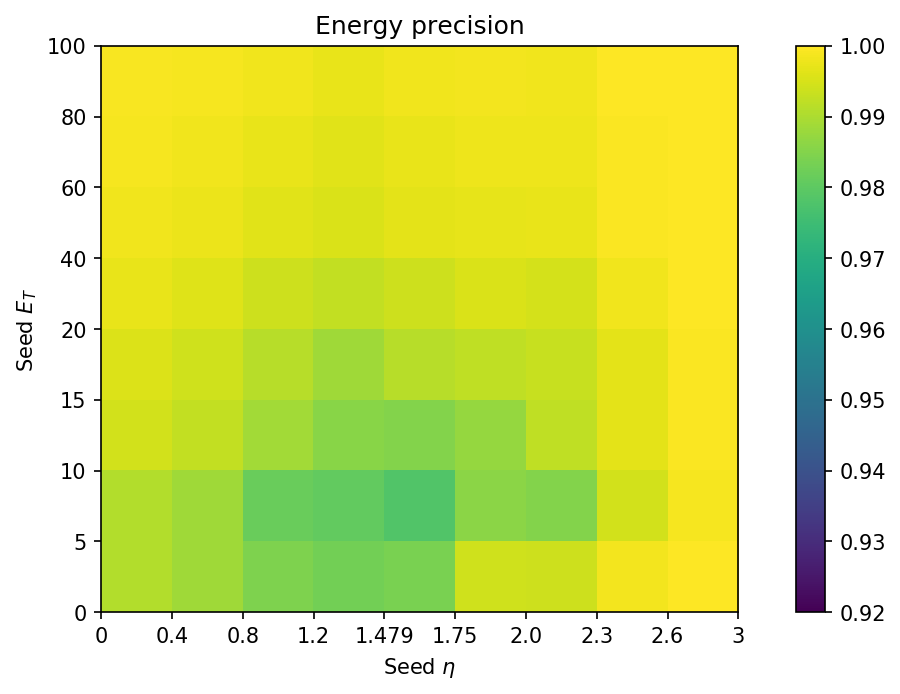

In [8]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4)].groupby(["eta_bin", "et_bin"]).apply( lambda gr:  (gr.E_tp / gr.Epred).mean())
plot_eteta2D(result,"Energy precision", vmin=0.92, vmax=1)

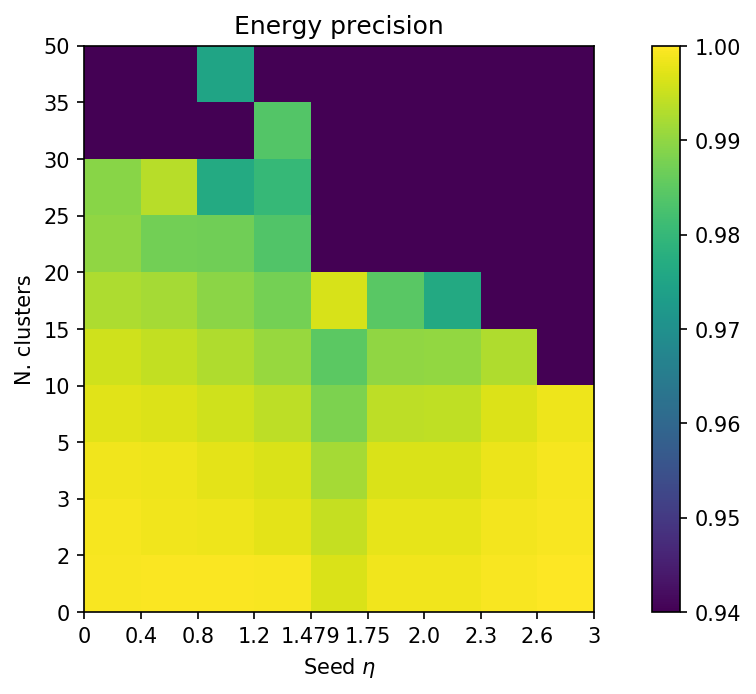

In [92]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4)].groupby(["eta_bin", "ncls_bin"])\
       .apply(lambda gr:  (gr.E_tp / gr.Epred).mean())\
       .unstack(fill_value=0).stack()
plot_nclseta2D(result,"Energy precision", vmin=0.94, vmax=1)

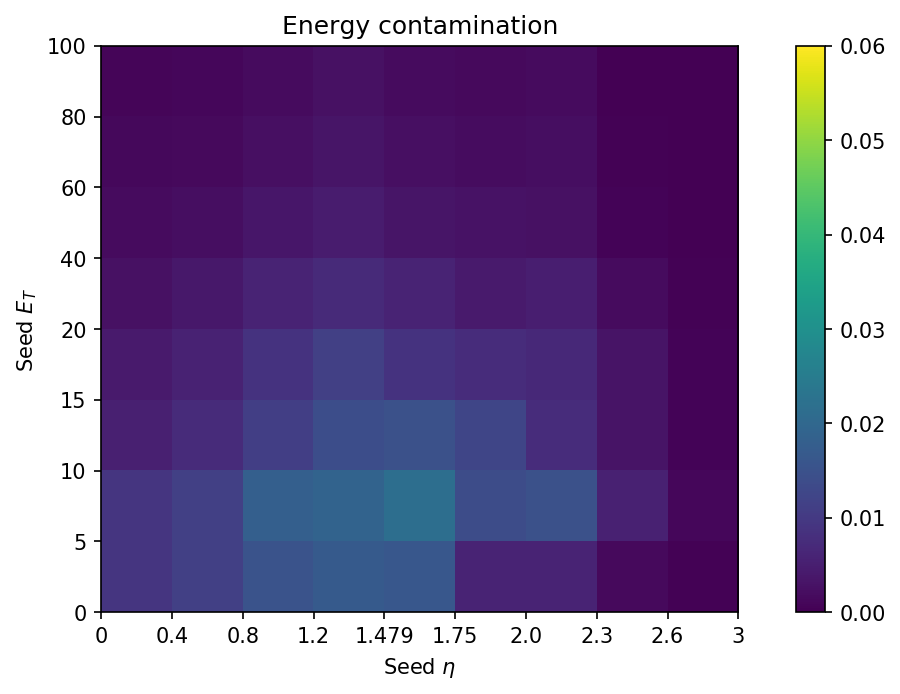

In [9]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4)].groupby(["eta_bin", "et_bin"]).apply( lambda gr:  (gr.E_fp / gr.Epred).mean())

plot_eteta2D(result,"Energy contamination", vmin=0, vmax=0.06)

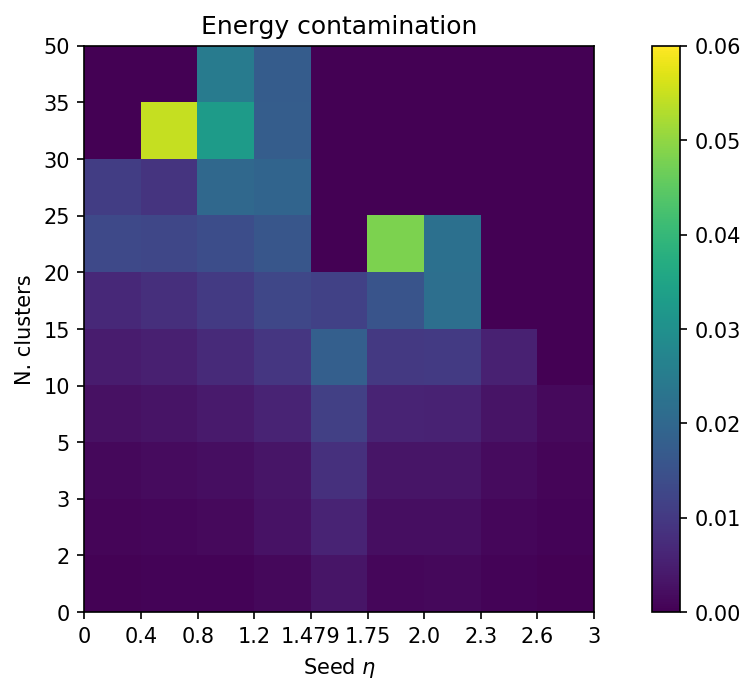

In [10]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4)].groupby(["eta_bin", "ncls_bin"])\
       .apply(lambda gr:  (gr.E_fp / gr.Epred).mean())\
       .unstack(fill_value=0).stack()
plot_nclseta2D(result,"Energy contamination", vmin=0, vmax=0.06)

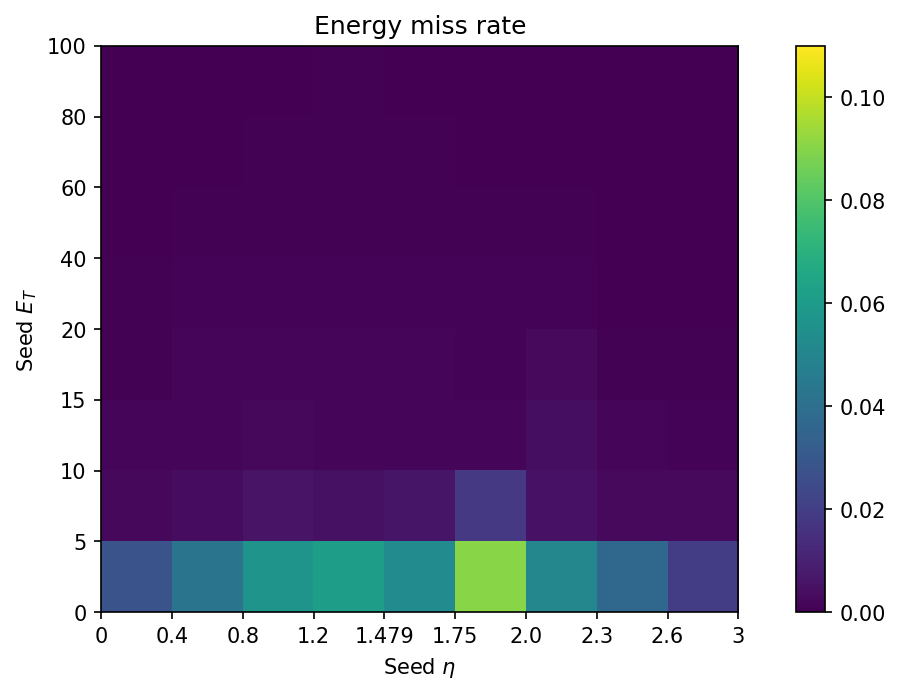

In [94]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4)].groupby(["eta_bin", "et_bin"]).apply( lambda gr:  (gr.E_fn / gr.Etrue).mean())

plot_eteta2D(result,"Energy miss rate", vmin=0, vmax=0.11)

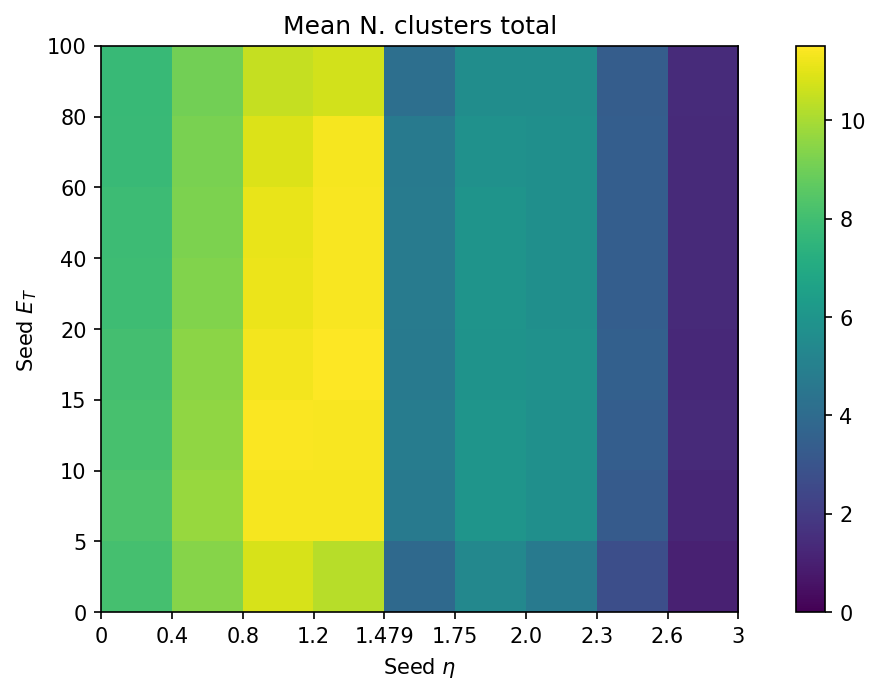

In [30]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4) ].groupby(["eta_bin", "et_bin"]).ncls.mean()

plot_eteta2D(result,"Mean N. clusters total", vmin=0)

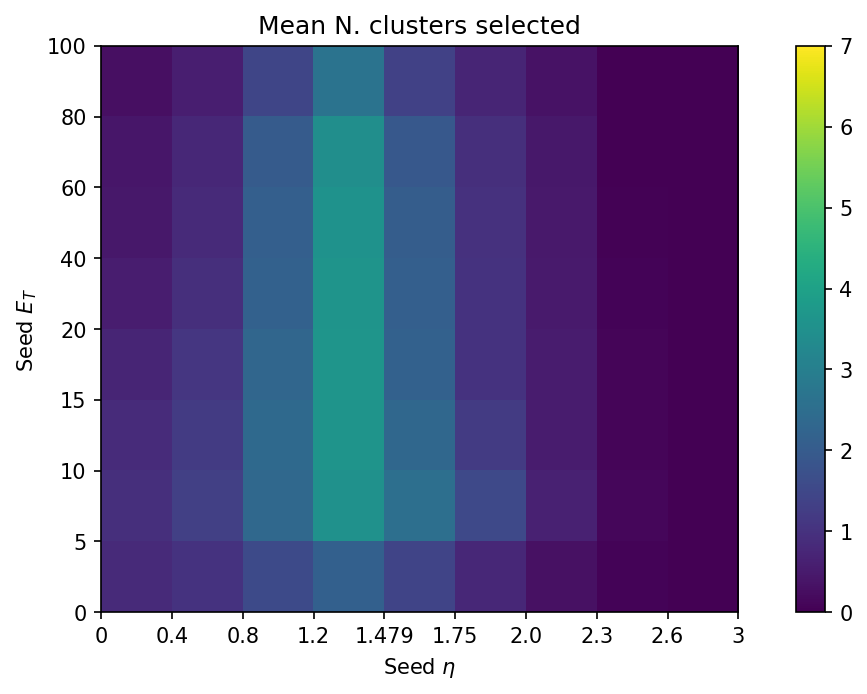

In [20]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4) ].groupby(["eta_bin", "et_bin"]).ncls_sel.mean()

plot_eteta2D(result,"Mean N. clusters selected", vmin=0, vmax=7)

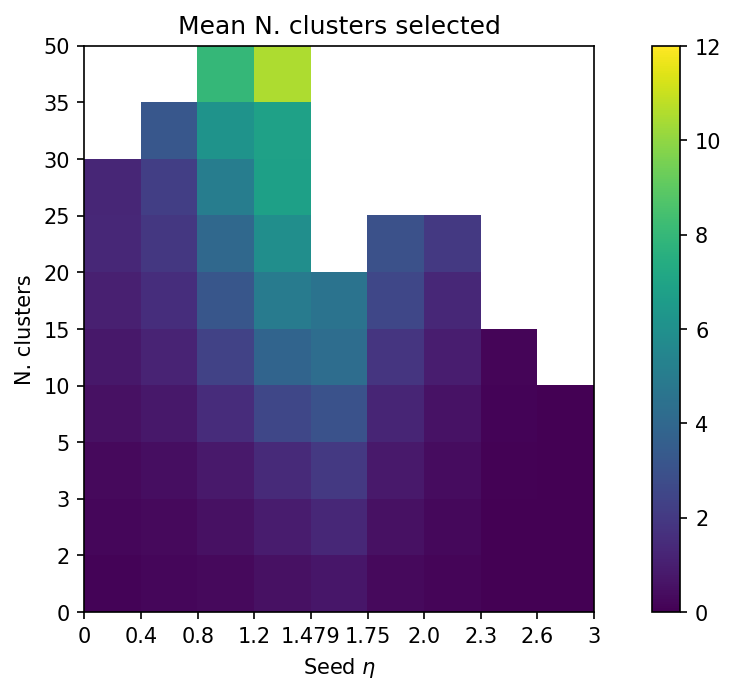

In [23]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4)].groupby(["eta_bin", "ncls_bin"]).ncls_sel.mean()

plot_nclseta2D(result,"Mean N. clusters selected", vmin=0, vmax=12)

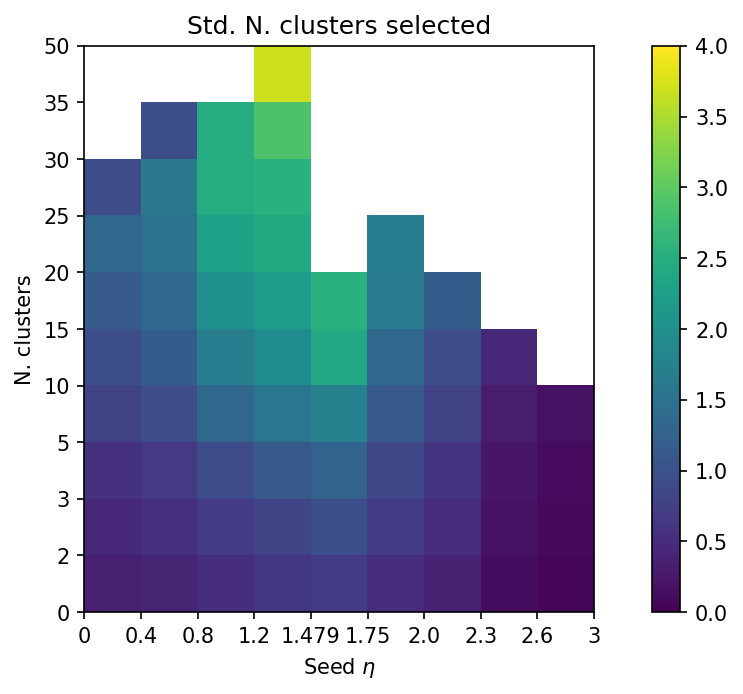

In [26]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4)].groupby(["eta_bin", "ncls_bin"]).ncls_sel.std()

plot_nclseta2D(result,"Std. N. clusters selected", vmin=0, vmax=4)

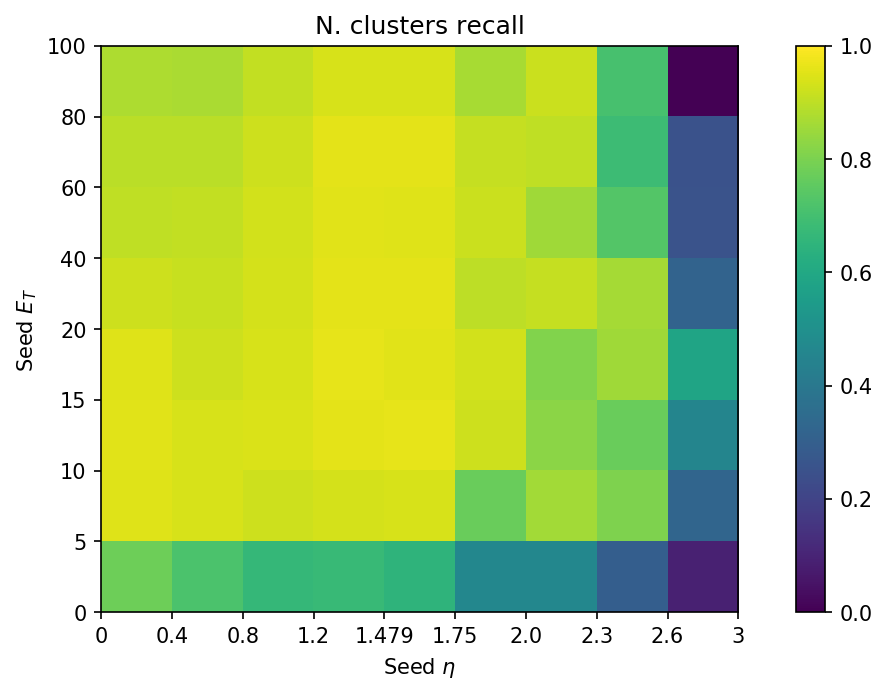

In [99]:
result =  dfc[(dfc.thres==0.8)&(dfc.Etrue>4) & (dfc.ncls_true >0)].groupby(["eta_bin", "et_bin"]).apply( lambda gr:  (gr.ncls_sel_true / gr.ncls_true).mean())

plot_eteta2D(result,"N. clusters recall", vmin=0, vmax=1)

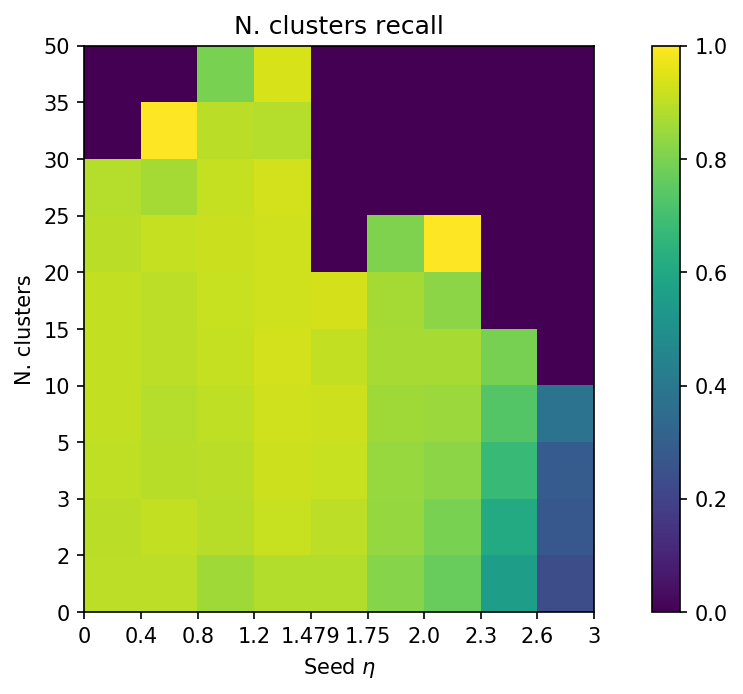

In [32]:
result =  dfc[(dfc.thres==0.8) & (dfc.Etrue>4) & (dfc.ncls_true >0)].groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.ncls_sel_true / gr.ncls_true).mean())\
             .unstack(fill_value=0).stack()

plot_nclseta2D(result,"N. clusters recall", vmin=0, vmax=1)

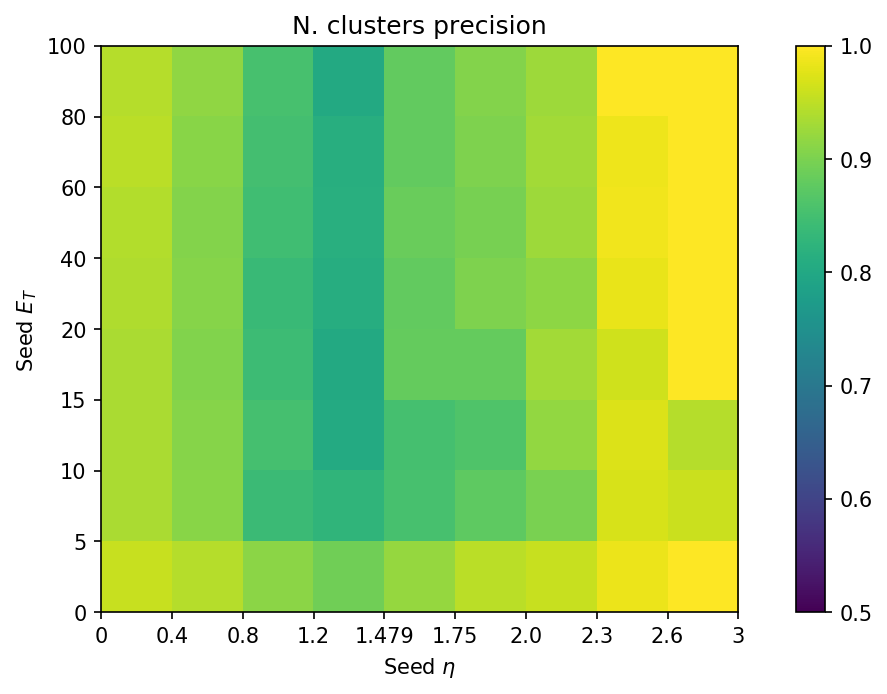

In [11]:
result =  dfc[(dfc.thres==0.8) & (dfc.Etrue>4) & (dfc.ncls_true >0)].groupby(["eta_bin", "et_bin"]).apply( lambda gr:  (gr.ncls_sel_true / gr.ncls_sel).mean())
plot_eteta2D(result,"N. clusters precision", vmin=0.5, vmax=1)

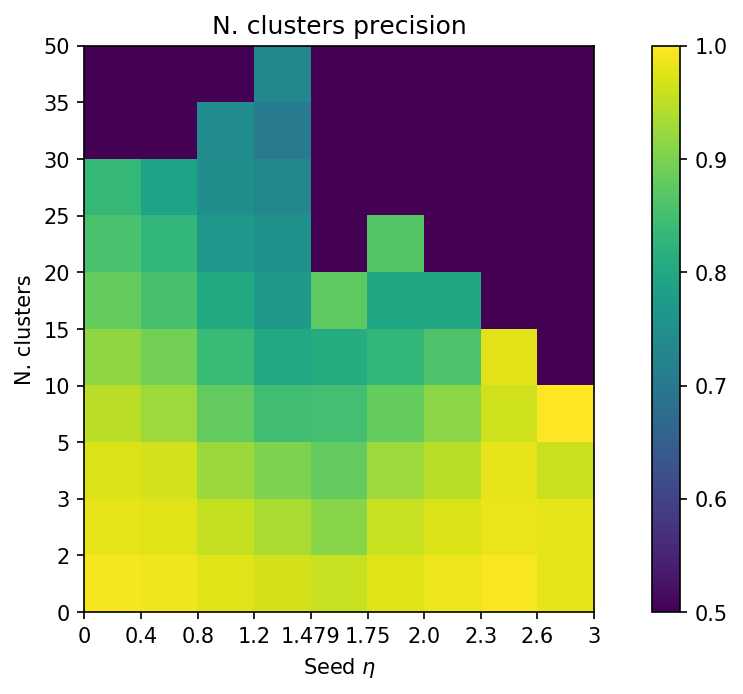

In [31]:
result =  dfc[(dfc.thres==0.8) & (dfc.Etrue>4) & (dfc.ncls_true >0)].groupby(["eta_bin", "ncls_bin"])\
             .apply( lambda gr:  (gr.ncls_sel_true / gr.ncls_sel).mean())\
             .unstack(fill_value=0).stack()

plot_nclseta2D(result,"N. clusters precision",vmin=0.5, vmax=1)

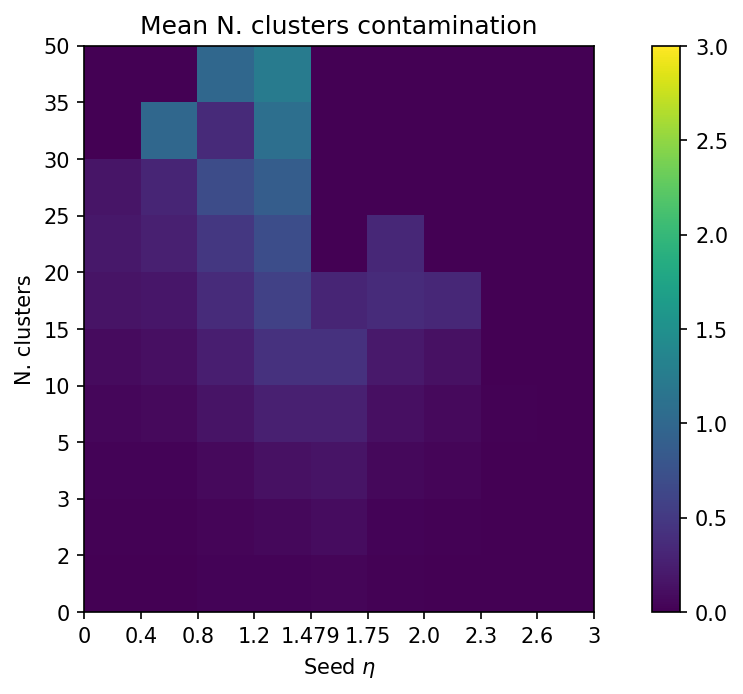

In [15]:
result =  dfc[(dfc.thres==0.9)&(dfc.Etrue>4) & (dfc.ncls_true >0)].groupby(["eta_bin", "ncls_bin"])\
        .apply( lambda gr:  (gr.ncls_sel - gr.ncls_sel_true).mean())\
       .unstack(fill_value=0).stack()

plot_nclseta2D(result,"Mean N. clusters contamination", vmin=0, vmax=3)